<span style='font-size: 300%; font-weight: bold;'>
<a style="position: fixed; bottom:5%; right:5%;" href="#top">&#8679;</a>
</span>

# Tracking without iTPC hits in Run 18

Compare tracks reconstructed in events with and without hits in sector 14

In [1]:
import uproot
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import mypytk.star as star

## Define branches to read

In [2]:
branches = {
    'ppx':   'Track.mPMomentumX',
    'ppy':   'Track.mPMomentumY',
    'ppz':   'Track.mPMomentumZ',
    'gpx':   'Track.mGMomentumX',
    'gpy':   'Track.mGMomentumY',
    'gpz':   'Track.mGMomentumZ',
    'ox':    'Track.mOriginX',
    'oy':    'Track.mOriginY',
    'oz':    'Track.mOriginZ',
    'nhits': 'Track.mNHitsFit',
    'chi2':  'Track.mChi2',
    'imp':   'TrackCovMatrix.mImp',
    'z':     'TrackCovMatrix.mZ',
    'pti':   'TrackCovMatrix.mPti',
    'tan':   'TrackCovMatrix.mTan',
    'sigma[5]': 'TrackCovMatrix.mSigma[5]',
}

## Define input files

In [3]:
labels = ['YES14', 'NO14']

f_name = lambda label: f'data/genevb/{label}/st_physics_19157003_raw_5500010_more.PicoDst.root'

rootfiles = [f_name(label) for label in labels]
print(f'{len(rootfiles)} file(s)')
rootfiles

2 file(s)


['data/genevb/YES14/st_physics_19157003_raw_5500010_more.PicoDst.root',
 'data/genevb/NO14/st_physics_19157003_raw_5500010_more.PicoDst.root']

## Create dataframe with tracks

Apply the following basic selection to reduce the memory footprint

- track origin in transverse plane < 10 cm ('or')
- track origin in z < 50 cm ('oz')
- track angle w.r.t. xy plane < pi/6 ( 30 degrees) ('polar')

In [4]:
%%time

filt_defs = {
    #'polar': lambda df: np.abs(np.arctan2(df.gpz, np.sqrt(df.gpx**2 + df.gpy**2))) < np.pi/6,
    'or':    lambda df: df.imp < 10,
    'oz':    lambda df: np.abs(df.z) < 50,
}

df, filt_counts = star.make_df(rootfiles, 'PicoDst', branches, filt_defs)

df.info(verbose=False)
print(filt_counts)
print(np.array(list(filt_counts.values()))/filt_counts['in'])

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 4062691 entries, (0, 0, 0) to (1, 13214, 0)
Columns: 20 entries, ppx to sigma[4]
dtypes: float32(18), int8(1), uint16(1)
memory usage: 310.1 MB
{'or': 9328323, 'oz': 4624688, 'in': 11093476}
[0.84088369 0.41688358 1.        ]
CPU times: user 29.7 s, sys: 6.42 s, total: 36.1 s
Wall time: 23 s


### Add more observables

In [5]:
df = df.assign(
    imp3d=np.sqrt(df.imp**2 + df.z**2),
    mag=np.sqrt(df.ppx**2 + df.ppy**2 + df.ppz**2),
    ppt=np.sqrt(df.ppx**2 + df.ppy**2),
    gpt=np.sqrt(df.gpx**2 + df.gpy**2),
    tphi=np.arctan2(df.gpy, df.gpx),
    teta=star.pseudorapidity(df.gpx, df.gpy, df.gpz),
    sector=star.tpc_sectors(np.arctan2(df.gpy, df.gpx), half='east')
)
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 4062691 entries, (0, 0, 0) to (1, 13214, 0)
Columns: 27 entries, ppx to sector
dtypes: float32(24), int64(1), int8(1), uint16(1)
memory usage: 434.1 MB


In [36]:
%%time

branches_v = {
    'vx':  'Event.mPrimaryVertexX',
    'vy':  'Event.mPrimaryVertexY',
    'vz':  'Event.mPrimaryVertexZ'
}

df_v, filt_counts = star.make_df(rootfiles, 'PicoDst', branches_v, {})

df_v.info(verbose=False)
print(filt_counts)
print(np.array(list(filt_counts.values()))/filt_counts['in'])

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 26441 entries, (0, 0, 0) to (1, 13214, 0)
Columns: 3 entries, vx to vz
dtypes: float32(3)
memory usage: 516.7 KB
{'in': 26441}
[1.]
CPU times: user 264 ms, sys: 8.95 ms, total: 272 ms
Wall time: 275 ms


In [37]:
df_v.index = df_v.index.droplevel(2)
df_v

vx        vy          vz
file entry                                
0    0     -0.073269 -0.214967   10.622836
     1      0.134421 -0.136378   57.116100
     2      0.175472 -0.145230   41.453831
     3     -0.028278  0.030591   20.428318
     4     -0.024800 -0.323127   22.372105
     5     -0.001240 -0.091005  136.659332
     6     -0.413463  0.019496  160.871552
     7      0.306946 -0.010009 -130.470016
     8      0.169852 -0.198277  -11.697610
     9      0.094555 -0.174069    9.071682
     10    -0.046236 -0.056700   42.943310
     11     0.230205 -0.079189  -47.362747
     12     0.297108 -0.060637 -108.609940
     13     0.127170 -0.462879  -41.370113
     14     0.120341 -0.052123  -64.806999
     15     0.191119 -0.090894 -101.410408
     16     0.006659 -0.178927  -12.779554
     17     0.160358 -0.202101   -1.192991
     18     0.146851 -0.194191  -95.818680
     19     0.116381 -0.151482   32.467976
     20    -0.044588 -0.059382  155.453049
     21    -0.047214 -0.113219    3.871428
     22     0.058316 -0.157634   78.018089
     23     0.252099 -0.299187  -97.435699
     24     0.164609 -0.024427   11.042443
     25     0.034866 -0.055904  -87.860176
     26    -0.122847 -0.111032   88.014999
     27     0.057537 -0.146821  -44.401711
     28    -0.159587 -0.352634   61.926395
     29     0.035909 -0.212873    8.291366
...              ...       ...         ...
1    13185  0.168532 -0.144692 -104.919312
     13186  0.244655 -0.220048  -37.807537
     13187  0.184738 -0.273437  -94.193161
     13188 -0.052605 -0.179231  -12.994408
     13189 -0.008669 -0.117821  -89.759445
     13190 -0.009794 -0.017212   54.545181
     13191 -0.004194 -0.106485  117.104698
     13192  0.017673 -0.179476   29.233021
     13193  0.187519 -0.149629   -5.476491
     13194  0.196093 -0.237993  -97.384895
     13195  0.196525 -0.257550   16.282112
     13196  0.226770 -0.049231 -143.013596
     13197  0.003401 -0.154540    6.938941
     13198  0.431067 -0.151206 -168.023346
     13199  0.019901 -0.091029   -0.505055
     13200  0.089728 -0.158613  -44.921917
     13201  0.152792  0.020157 -116.527565
     13202  0.078531 -0.159594  -43.276012
     13203 -0.197239 -0.202182   69.433548
     13204  0.032690 -0.268389  123.893417
     13205  0.106979 -0.268063  -24.799562
     13206  0.160287 -0.165729  -44.738594
     13207  0.005599 -0.556984   21.592203
     13208  0.568105 -0.153224   16.497549
     13209  0.160603 -0.049402  -82.174751
     13210  0.152055 -0.148404  -85.513504
     13211 -0.072058 -0.076778  128.851517
     13212 -0.151670 -0.107506  196.473923
     13213 -0.096831 -0.041492   96.174973
     13214 -0.008994  0.161864   69.289986

[26441 rows x 3 columns]

In [38]:
df

ppx       ppy       ppz       gpx       gpy  \
file entry subentry                                                     
0    0     0        -0.463050  0.141828 -0.408746 -0.463081  0.141092   
           5         0.000000  0.000000  0.000000 -0.134286 -0.209011   
           6         0.000000  0.000000  0.000000  0.266295  0.017760   
           7         0.376250 -0.134123  0.357443  0.377845 -0.136808   
           8        -1.003478 -0.052314 -1.016289 -1.006180 -0.052724   
           9        -0.265379 -0.322187  0.289032 -0.264963 -0.328112   
           10        0.521598 -0.063065  0.457343  0.522839 -0.062684   
           11        0.529279  0.319923 -0.224936  0.517101  0.317634   
           12        0.107062  0.503055 -0.432612  0.109230  0.506308   
           13       -0.135334 -1.253566 -0.691979 -0.136589 -1.243778   
           14        0.000000  0.000000  0.000000  0.291631  0.285726   
           15       -0.625578 -0.202196  0.221136 -0.620004 -0.196546   
           16        0.454988 -0.780345  0.159067  0.454063 -0.777131   
           17        0.860542  0.316640  0.108644  0.850398  0.308473   
           18        0.218153 -0.244502  0.201841  0.215848 -0.244537   
           20        0.109621  0.321664  0.283450  0.123768  0.327369   
           22       -0.041391  0.210620  0.071468 -0.038819  0.212708   
           23        0.000000  0.000000  0.000000  0.212056 -0.006550   
           24        0.000000  0.000000  0.000000 -0.628313  0.388300   
           26        0.000000  0.000000  0.000000 -0.085461 -0.024890   
           27       -0.111638 -0.462932  0.222345 -0.096411 -0.458668   
           28        0.000000  0.000000  0.000000  0.168393  0.060959   
           29       -0.461543 -0.068344 -0.291485 -0.468319 -0.073032   
           30       -0.176391 -0.148802 -0.143734 -0.176496 -0.145524   
           32        0.473865  0.547938 -0.205948  0.504649  0.562349   
           33       -0.264063 -0.040242 -0.016758 -0.263800 -0.038854   
           34        0.534033  0.224350 -0.246895  0.535789  0.218045   
           35       -0.016539 -0.300972 -0.144166 -0.018621 -0.302012   
           36        0.151786 -0.541222  0.472173  0.148765 -0.538351   
           37        0.239302  0.333778 -0.204130  0.247268  0.336104   
...                       ...       ...       ...       ...       ...   
1    13212 2         0.000000  0.000000  0.000000  0.452112  0.024043   
           5         0.000000  0.000000  0.000000  0.613979  0.339231   
           34        0.000000  0.000000  0.000000 -0.008266  0.290257   
           36        0.000000  0.000000  0.000000 -0.093960  0.244315   
           44        0.000000  0.000000  0.000000 -0.147760  0.513760   
           48        0.000000  0.000000  0.000000  0.059316  0.071829   
           50        0.000000  0.000000  0.000000 -0.621109  0.078780   
           62        0.000000  0.000000  0.000000  0.023104  0.123816   
           77        0.000000  0.000000  0.000000 -0.113492 -0.031993   
           84        0.000000  0.000000  0.000000  0.124735  0.026291   
           92        0.000000  0.000000  0.000000  0.074077  0.074965   
     13213 17        0.000000  0.000000  0.000000  0.359964  0.061950   
           24        0.000000  0.000000  0.000000 -0.272888  0.038822   
           34        0.000000  0.000000  0.000000  0.364686  0.200427   
           48        0.000000  0.000000  0.000000 -0.237434  0.086971   
           141       0.000000  0.000000  0.000000  0.114516 -0.535767   
           155       0.000000  0.000000  0.000000  0.062421 -0.152057   
           162       0.000000  0.000000  0.000000 -0.026625 -0.058107   
           169       0.000000  0.000000  0.000000 -0.796299 -0.355278   
           192       0.000000  0.000000  0.000000 -0.054020  0.007279   
           220       0.000000  0.000000  0.000000 -0.038252  0.004728   
           257       0.000000  0.000000  0.000000 -0.065737  0.007165   
           

## Create filters for tracks

In [6]:
is_primary = lambda df: df.mag > 0
#print(is_primary(df).sum())

is_primary_east = lambda df: is_primary(df) & (df.teta < 0) & (df.oz < 0)
#print(is_primary_east(df).sum())

is_primary_west = lambda df: is_primary(df) & (df.teta > 0) & (df.oz > 0)
#print(is_primary_west(df).sum())

# We are mainly interested in the East side with iTPC sector
points_east = lambda df: (df.teta < 0) & (df.oz < 0)
#print(points_east(df).sum())

points_west = lambda df: (df.teta > 0) & (df.oz > 0)
#print(points_west(df).sum())

in_pt_bin = lambda df, pt_min, pt_max: (df.gpt > pt_min) & (df.gpt < pt_max)
#in_sector = lambda df, sector: (df.tphi > star.TPC_SECTORS_EAST[sector][0]) & (df.tphi < star.TPC_SECTORS_EAST[sector][1])
in_sector = lambda df, sector: (df.sector == sector)

## Preselected dataframes

In [7]:
idx = pd.IndexSlice
yes14 = idx[0,:,:]
no14  = idx[1,:,:]

df_Y = df.loc[yes14]
df_N = df.loc[no14]

points_east_Y = points_east(df_Y)
points_east_N = points_east(df_N)

is_primary_Y = is_primary(df_Y)
is_primary_N = is_primary(df_N)

### Masks for different $P_T$ bins

In [8]:
nbins_pt = 10
edges_pt = np.linspace(0.1, 1, nbins_pt)
edges_pt = np.append(edges_pt, np.inf)

in_pt_bin_Y = {}
in_pt_bin_N = {}
for i, (pt_min, pt_max) in enumerate(zip(edges_pt, edges_pt[1:])):
    in_pt_bin_Y[i] = in_pt_bin(df_Y, pt_min, pt_max)
    in_pt_bin_N[i] = in_pt_bin(df_N, pt_min, pt_max)
    #print( np.sum(in_pt_bin_Y[i]), np.sum(in_pt_bin_N[i]) )

## Plot track parameters for different $P_T$ bins

## YES14 vs NO14 datasets for all/global and primary tracks

### Track $\phi$ vs $\eta$

### Track $\phi$ vs $\eta$, narrow $\eta$

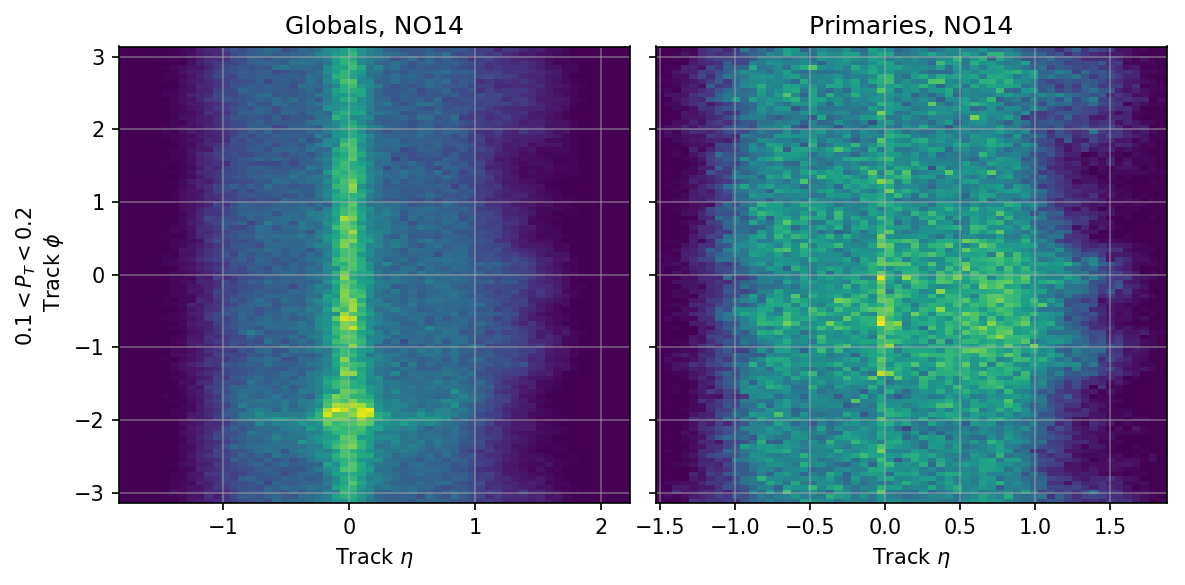

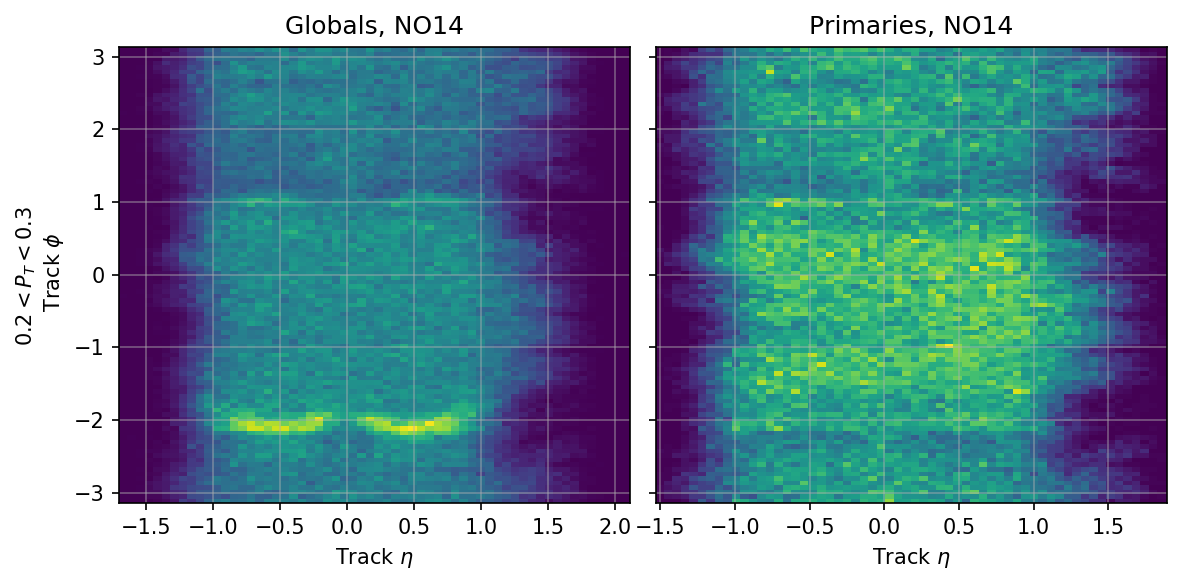

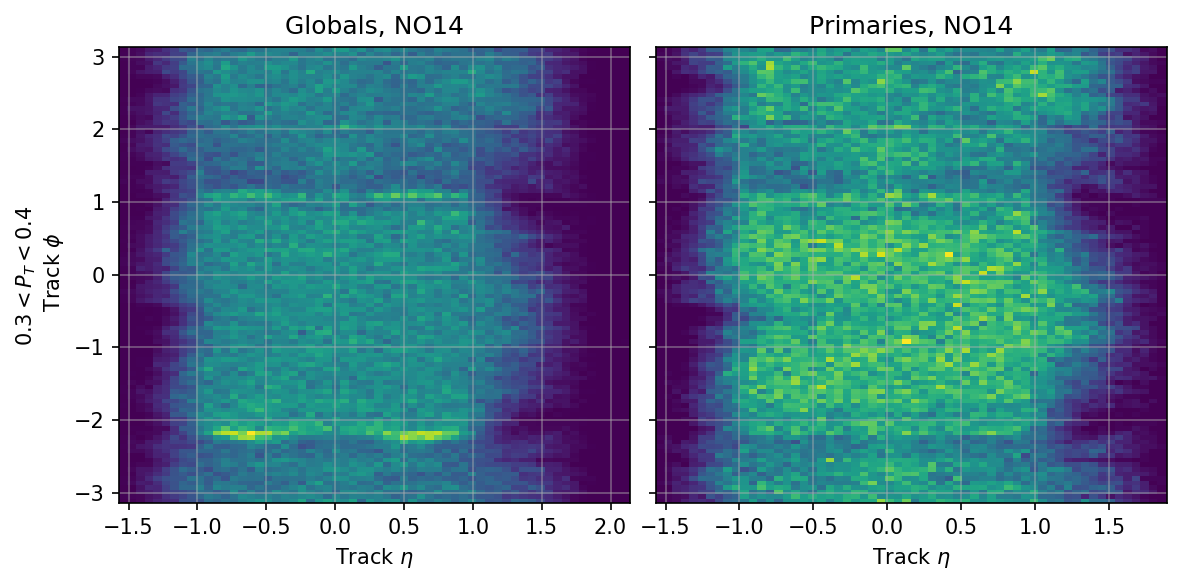

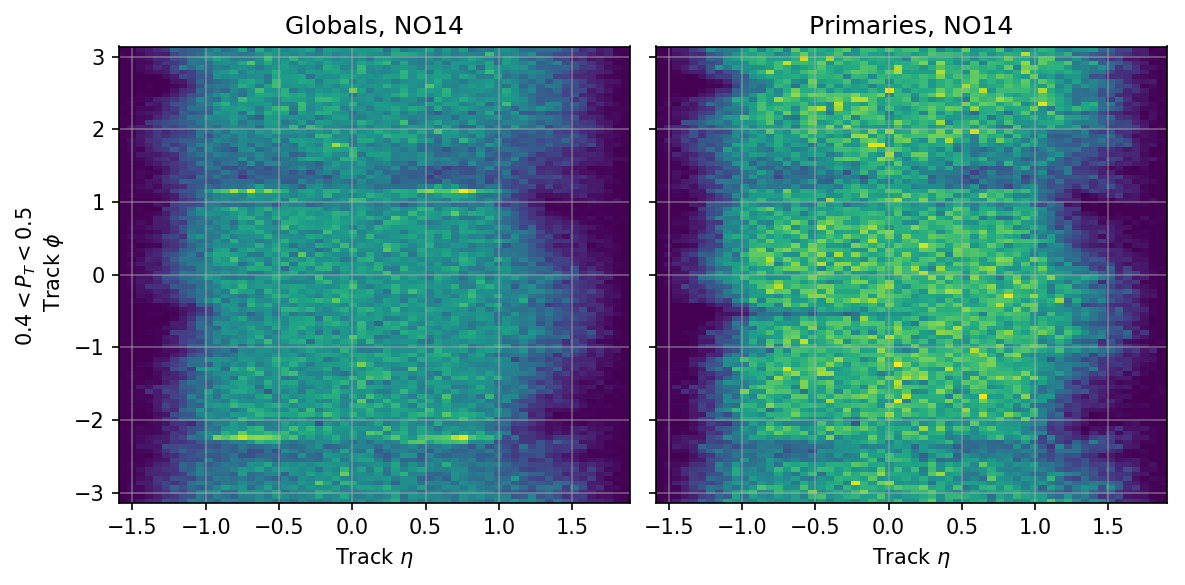

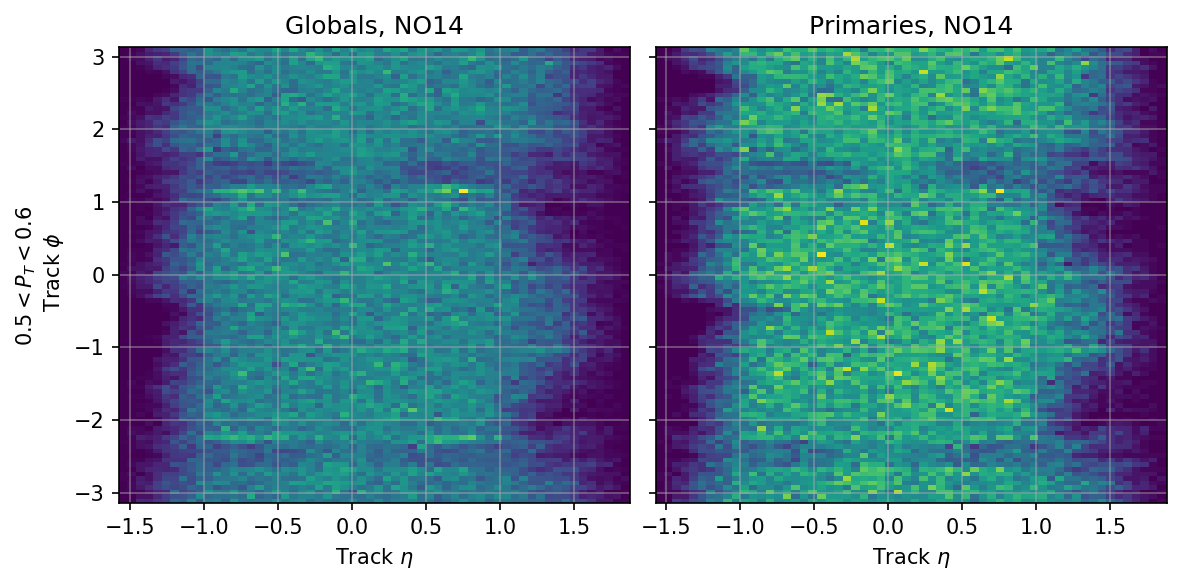

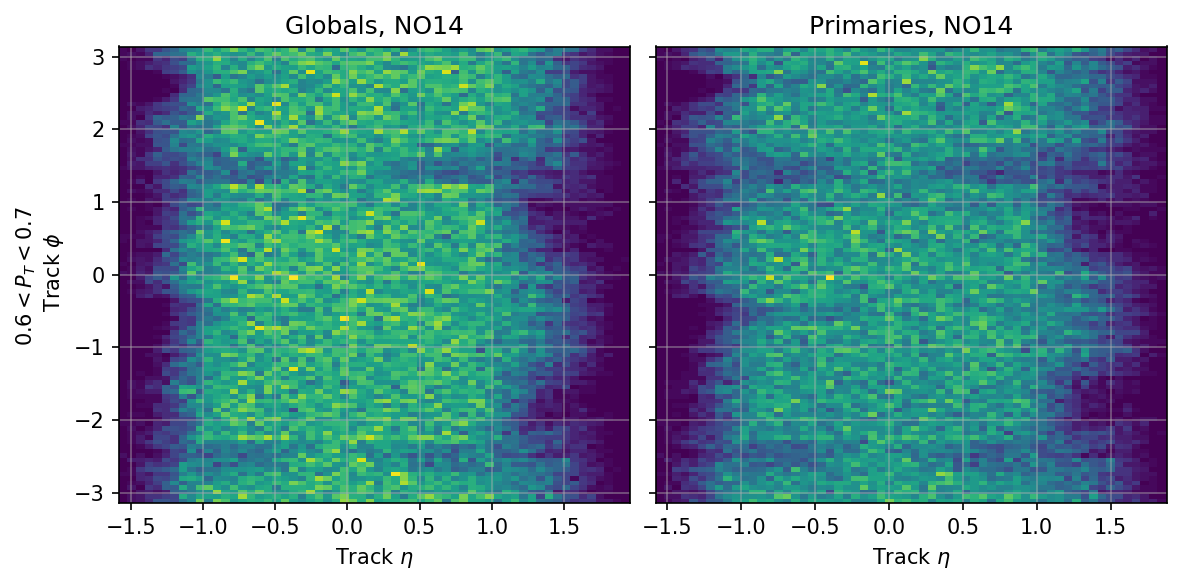

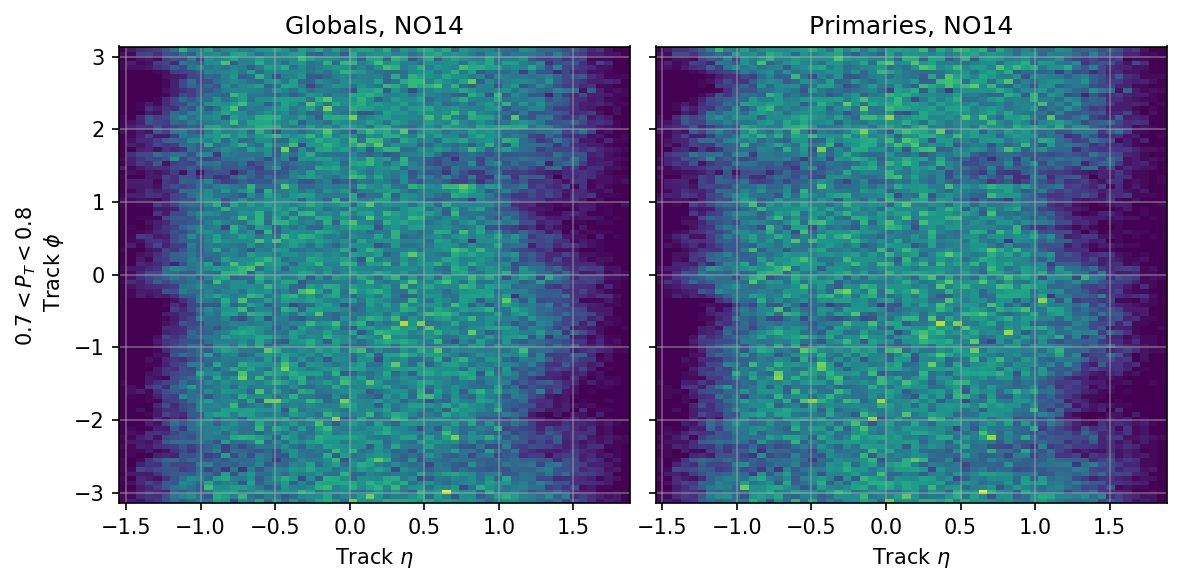

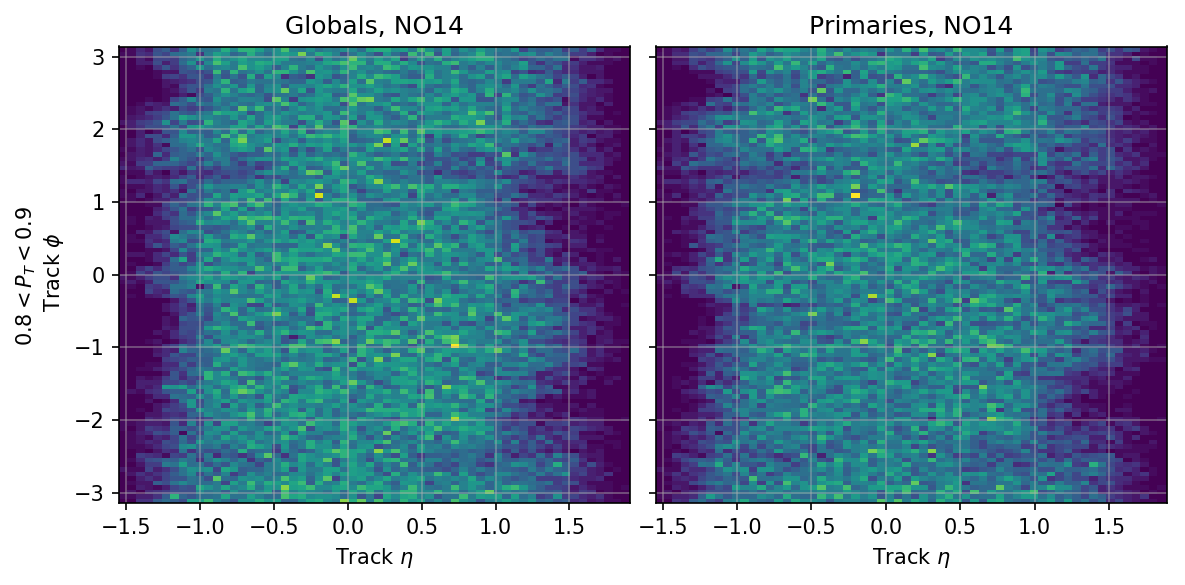

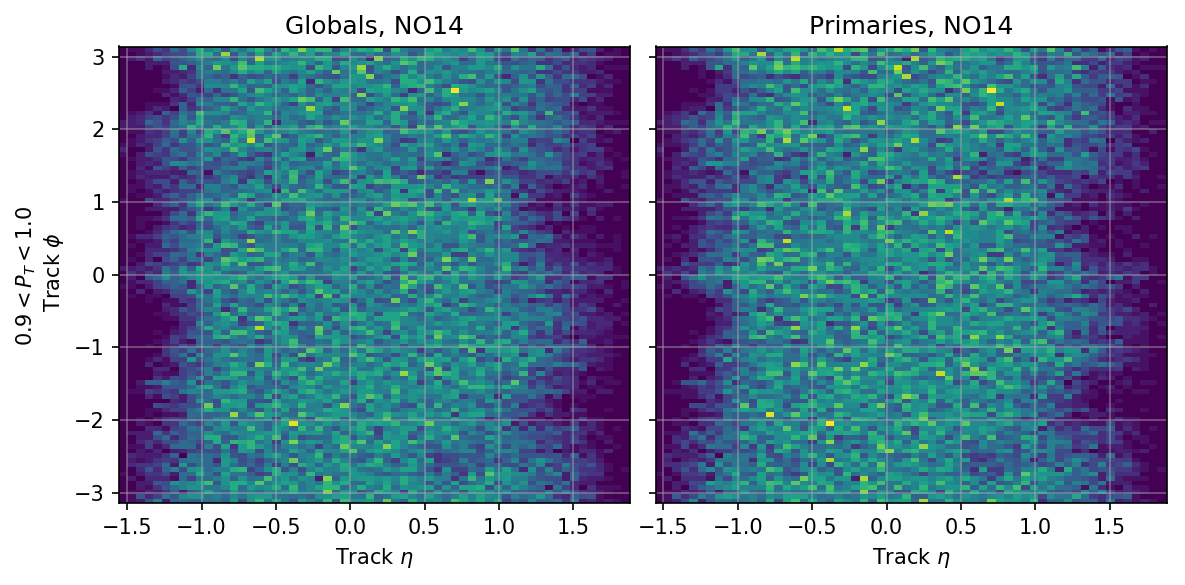

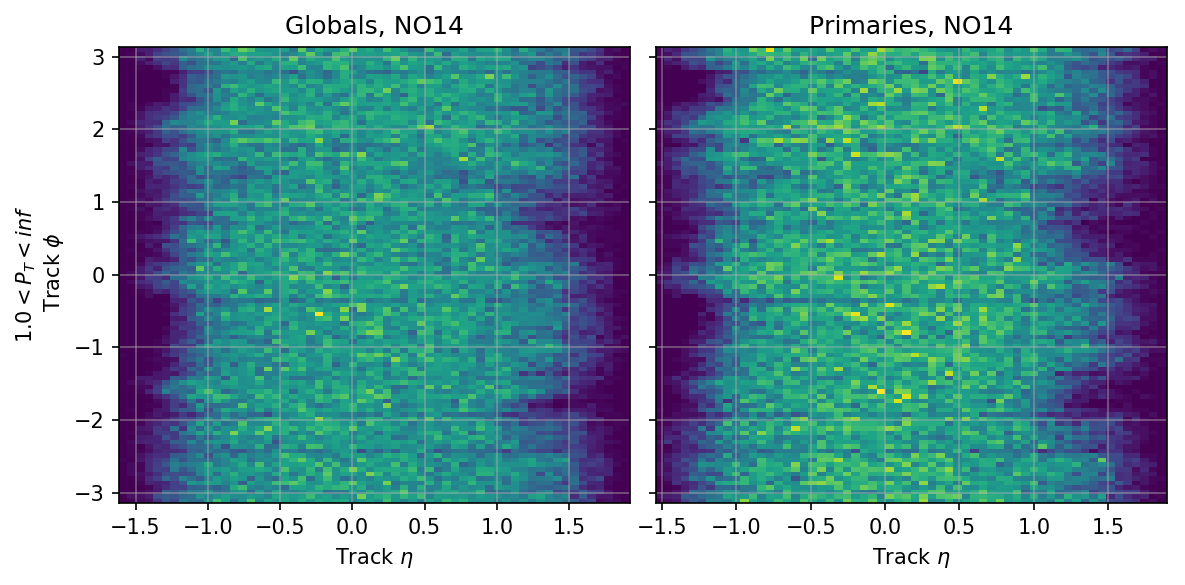

In [66]:
#fig, ax = plt.subplots(nbins_pt, 4, figsize=(10, 2.5*nbins_pt), sharey='row', sharex='col')

#h_kwargs = dict(bins=[60, 100], norm=mpl.colors.LogNorm())
h_kwargs = dict(bins=[60, 100])

for i, (pt_min, pt_max) in enumerate(zip(edges_pt, edges_pt[1:])):
    
    fig, ax = plt.subplots(1, 2, figsize=(8, 4), sharey='row')#, , sharex='col')

    #select = in_pt_bin(df_Y, pt_min, pt_max)
#
    #a = ax[i, 0]
    #h = a.hist2d(df_Y.loc[ select ].teta, df_Y.loc[ select ].tphi, **h_kwargs)
    #a.set_title('Globals, YES14') if i == 0 else None
    #a.set_xlabel('Track $\eta$') if i == nbins_pt-1 else None
    #a.set_ylabel(f'${pt_min:.1f} < P_T < {pt_max:.1f}$ \n Track $\phi$')
    #a.grid()
    #
    #select = is_primary_Y & in_pt_bin(df_Y, pt_min, pt_max)
#
    #a = ax[i, 1]
    #h = a.hist2d(df_Y.loc[ select ].teta, df_Y.loc[ select ].tphi, **h_kwargs)
    #a.set_title('Primaries, YES14') if i == 0 else None
    #a.set_xlabel('Track $\eta$') if i == nbins_pt-1 else None
    #a.grid()

    select = in_pt_bin(df_N, pt_min, pt_max)

    a = ax[0]
    h = a.hist2d(df_N.loc[ select ].teta, df_N.loc[ select ].tphi, **h_kwargs)
    a.set_title('Globals, NO14')# if i == 0 else None
    a.set_xlabel('Track $\eta$')# if i == nbins_pt-1 else None
    a.set_ylabel(f'${pt_min:.1f} < P_T < {pt_max:.1f}$ \n Track $\phi$')
    a.grid()

    select = is_primary_N & in_pt_bin(df_N, pt_min, pt_max)

    a = ax[1]
    h = a.hist2d(df_N.loc[ select ].teta, df_N.loc[ select ].tphi, **h_kwargs)
    a.set_title('Primaries, NO14') #if i == 0 else None
    a.set_xlabel('Track $\eta$')   #if i == nbins_pt-1 else None
    a.grid()

    plt.tight_layout()
    plt.subplots_adjust(wspace=0.05, hspace=0.05)
    #plt.show()
    plt.savefig(f'graphics/phi_vs_eta_pt_bin_{i}.png', bbox_inches='tight', pad_inches=0.1)

### Track $\phi$ distributions for all and primary tracks

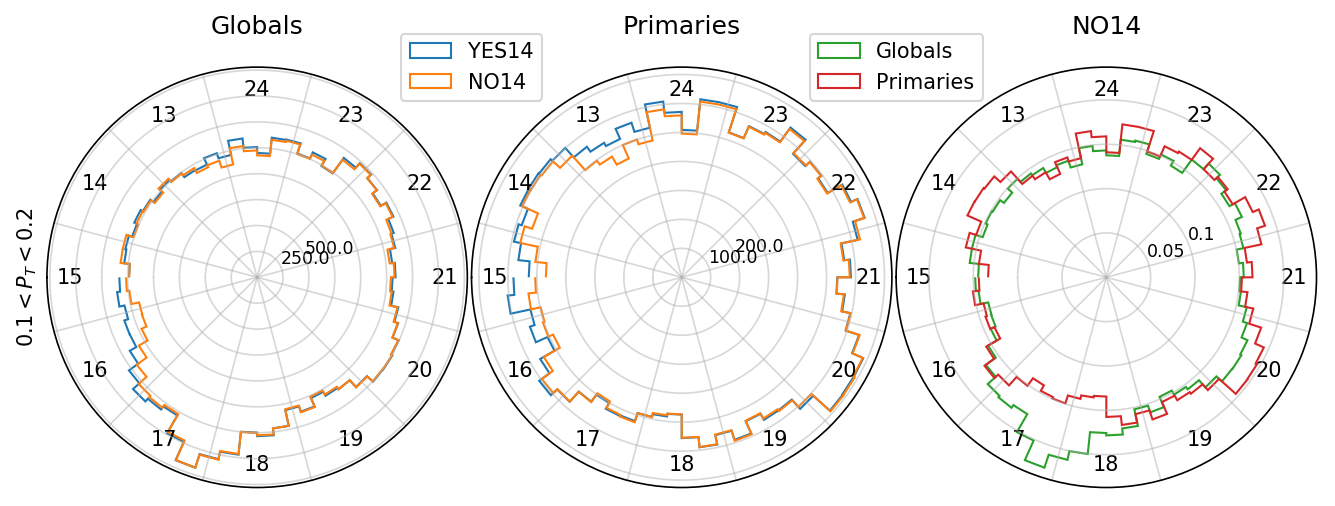

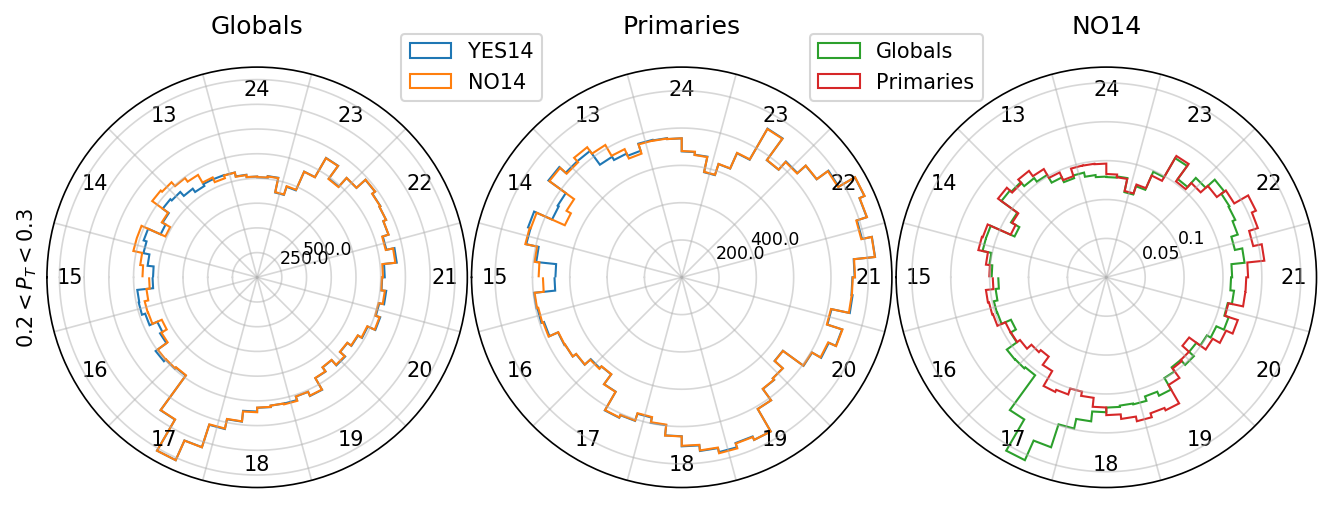

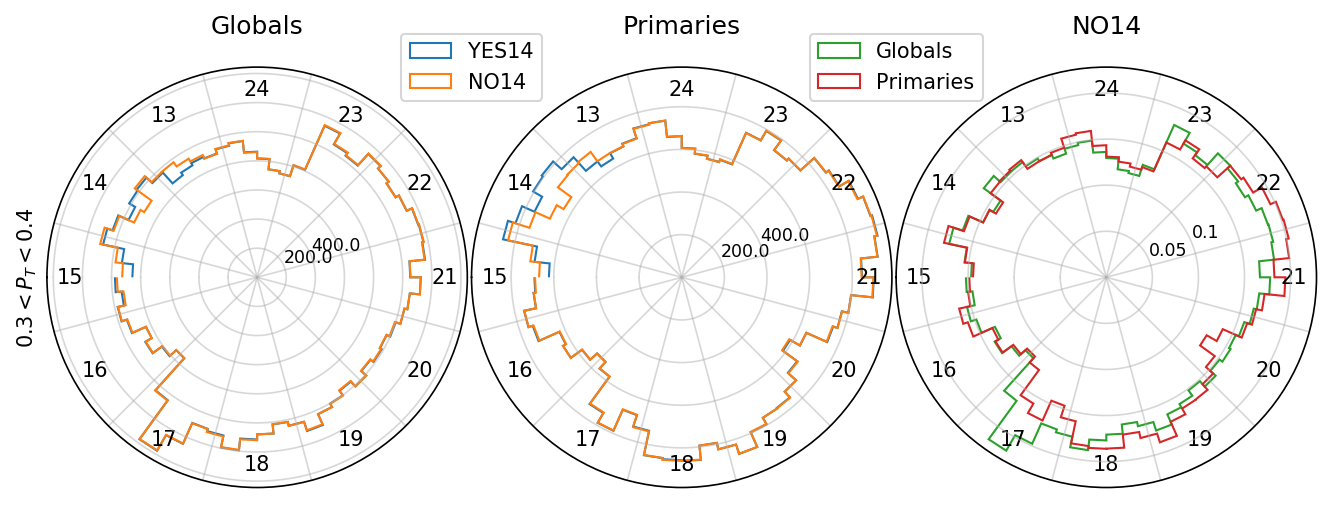

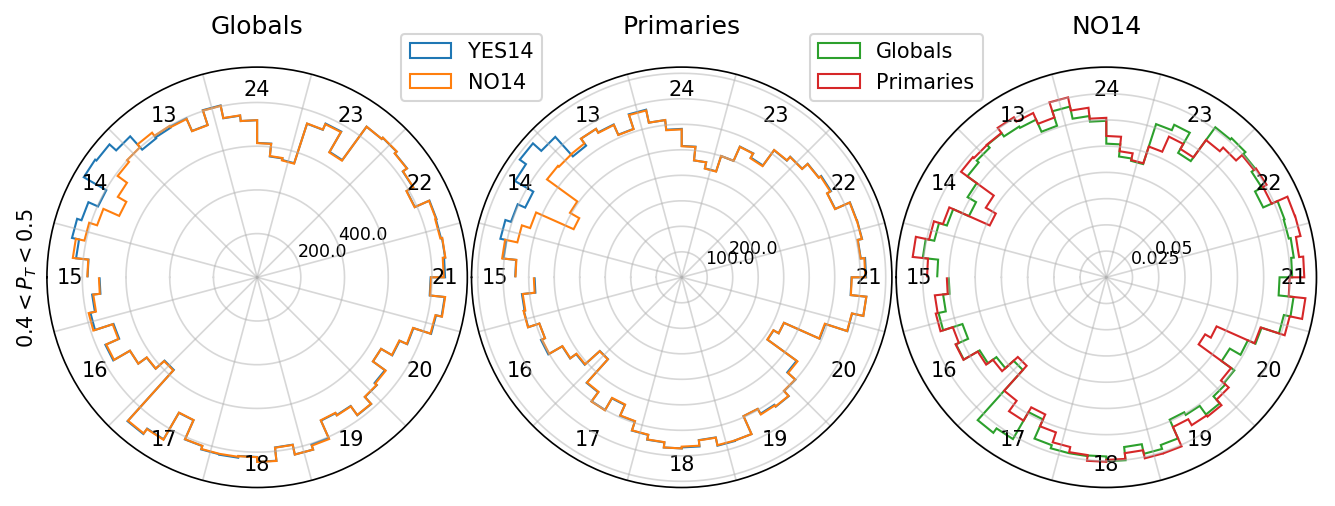

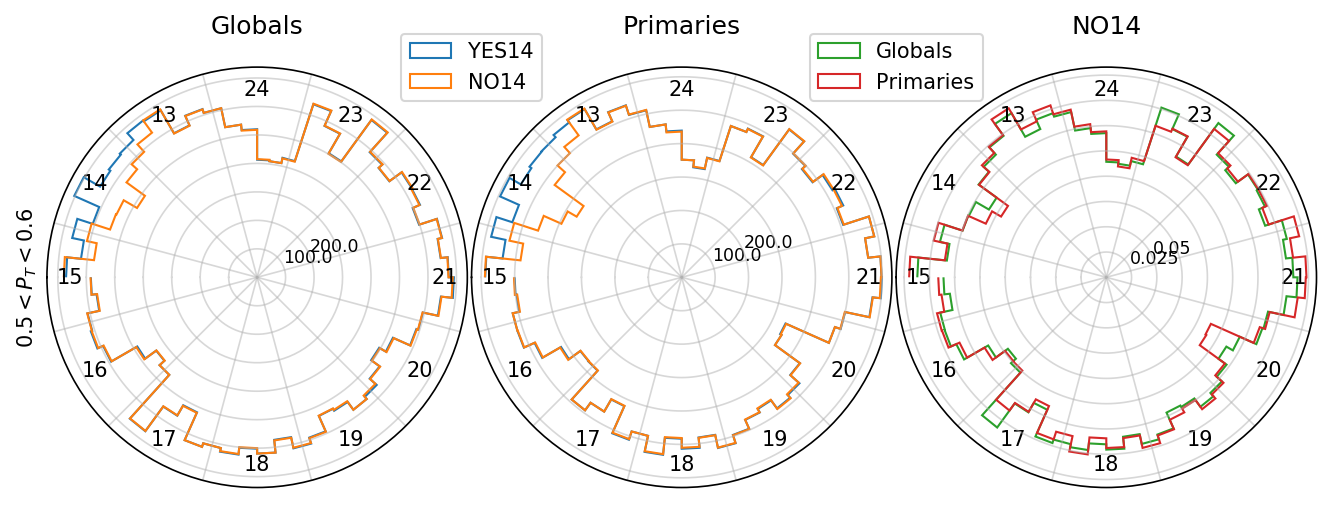

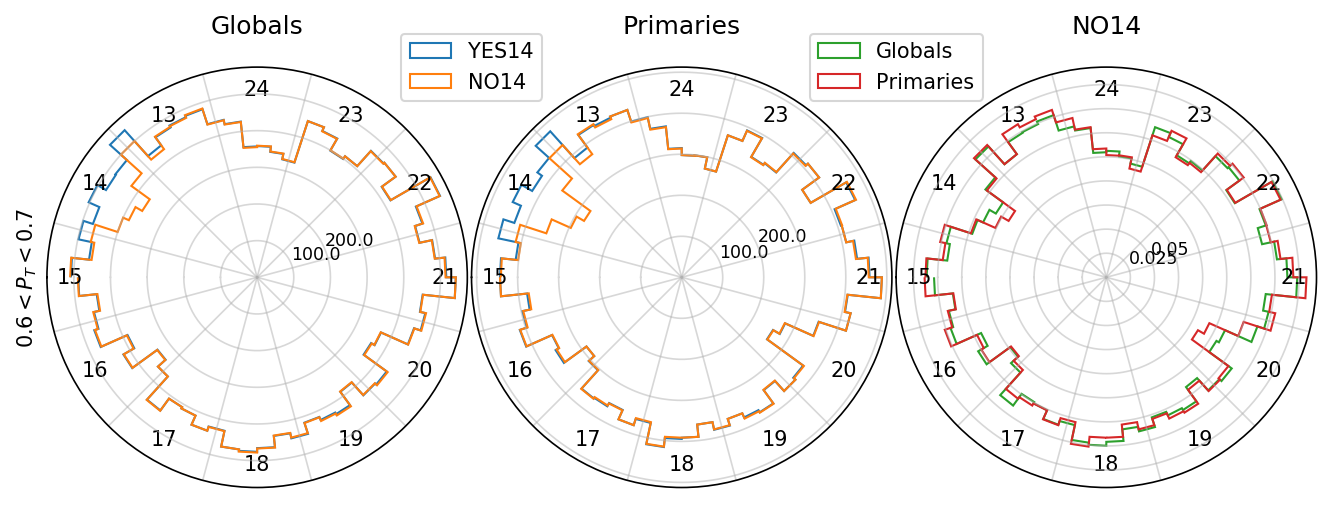

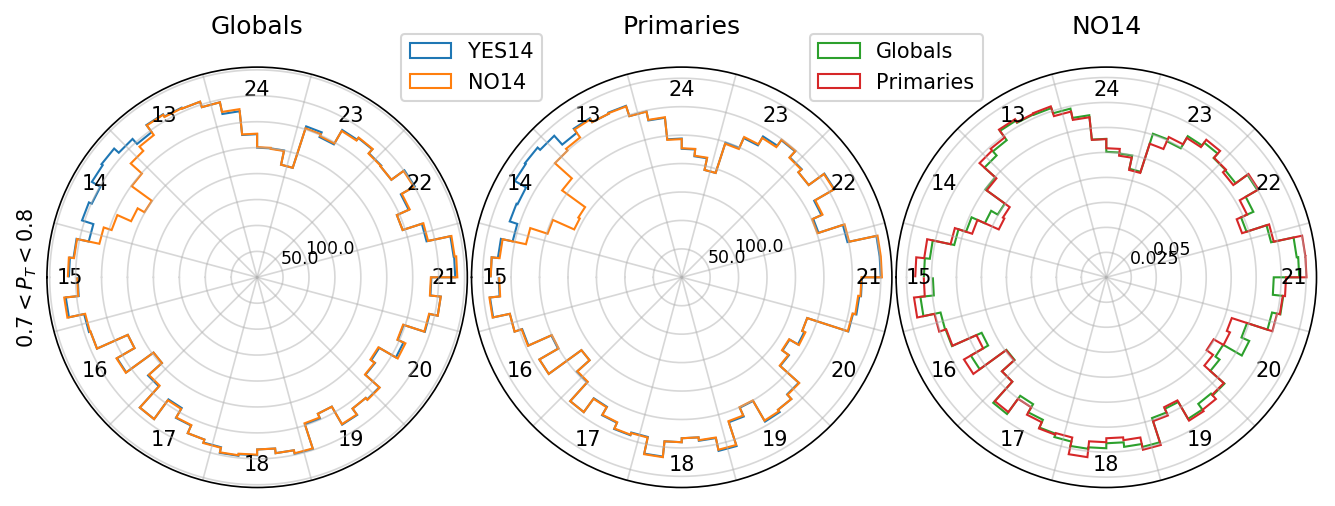

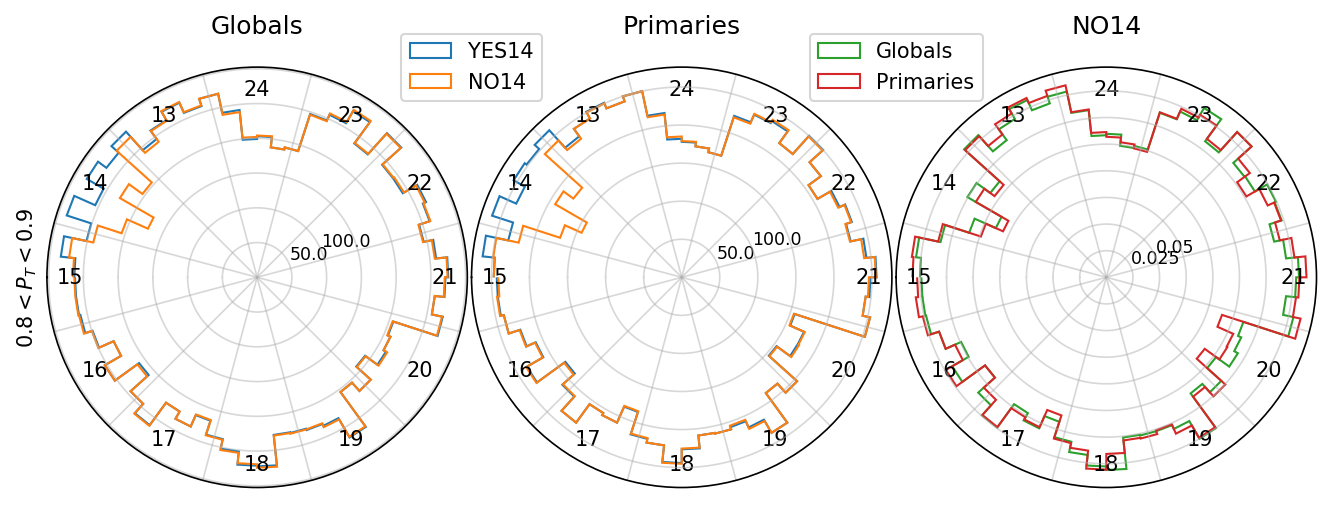

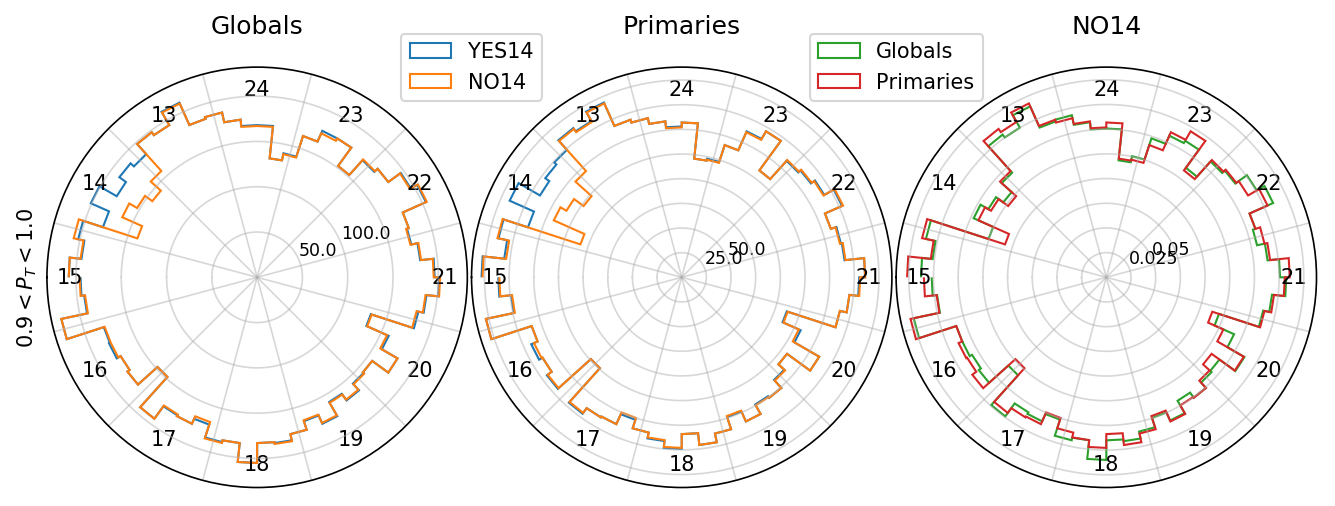

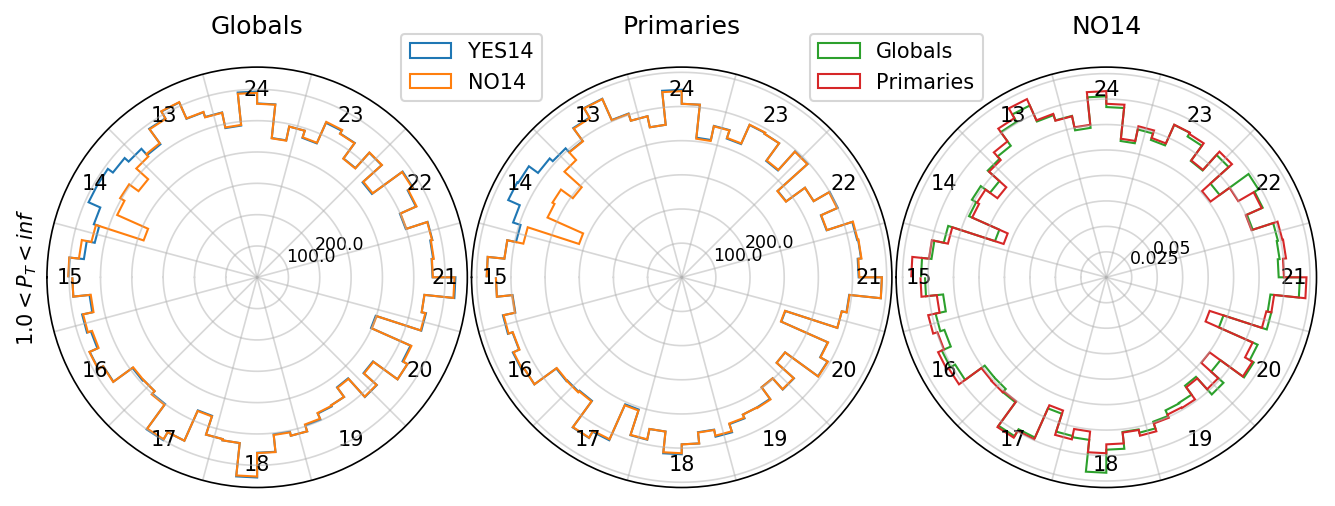

In [60]:
subplot_kw = dict(projection='polar')
#fig, ax = plt.subplots(nbins_pt, 3, figsize=(9, 4*nbins_pt), subplot_kw=subplot_kw)

h_kwargs = dict(bins=np.linspace(-np.pi, np.pi, 61), histtype='step')

for i, (pt_min, pt_max) in enumerate(zip(edges_pt, edges_pt[1:])):
 
    fig, ax = plt.subplots(1, 3, figsize=(9, 4), subplot_kw=subplot_kw)
    #in_pt_bin_Y = in_pt_bin(df_Y, pt_min, pt_max)
    #in_pt_bin_N = in_pt_bin(df_N, pt_min, pt_max)

    select_Y = points_east_Y & in_pt_bin_Y[i]
    select_N = points_east_N & in_pt_bin_N[i]

    #a = ax[i, 0]
    a = ax[0]
    a.hist(df_Y.loc[ select_Y ].tphi, label='YES14', **h_kwargs)
    a.hist(df_N.loc[ select_N ].tphi, label='NO14', **h_kwargs)
    
    a.set_title('Globals')# if i == 0 else None
    a.set_xticklabels([])
    a.set_ylabel(f'${pt_min:.1f} < P_T < {pt_max:.1f}$')
    star.tpc_grid(a, star.TPC_SECTOR_IDS_EAST, -20)
    
    a = ax[2]
    a.hist(df_N.loc[ select_N ].tphi, label='Globals', density=True, color='C2', **h_kwargs)

    # Now constrain to primary tracks
    select_Y = select_Y & is_primary_Y
    select_N = select_N & is_primary_N

    a = ax[1]
    a.hist(df_Y.loc[ select_Y ].tphi, label='YES14', **h_kwargs)
    a.hist(df_N.loc[ select_N ].tphi, label='NO14', **h_kwargs)
    
    a.set_title('Primaries')# if i == 0 else None
    a.set_xticklabels([])
    a.legend(bbox_to_anchor=(0,1), loc="center", borderaxespad=0)
    star.tpc_grid(a, star.TPC_SECTOR_IDS_EAST, -20)

    a = ax[2]
    a.hist(df_N.loc[ select_N ].tphi, label='Primaries', density=True, color='C3', **h_kwargs)
    
    a.set_title('NO14')# if i == 0 else None
    a.set_xticklabels([])
    a.set_yticklabels([])
    a.legend(bbox_to_anchor=(0,1), loc="center")
    star.tpc_grid(a, star.TPC_SECTOR_IDS_EAST, -20)

    plt.tight_layout()
    plt.subplots_adjust(hspace=0.01, wspace=0.01)
    #plt.show()
    plt.savefig(f'graphics/phi_pt_bin_{i}.png', bbox_inches='tight', pad_inches=0.1)

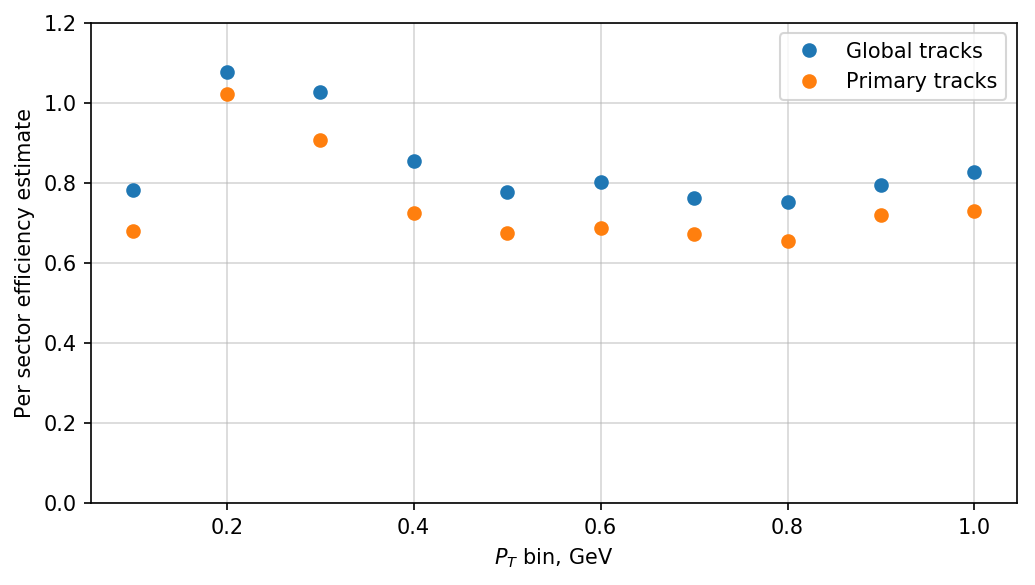

In [69]:
eff_globals = np.zeros(nbins_pt)
eff_primaries = np.zeros(nbins_pt)

for i, (pt_min, pt_max) in enumerate(zip(edges_pt, edges_pt[1:])):
    select_Y = points_east_Y & in_pt_bin_Y[i]
    select_N = points_east_N & in_pt_bin_N[i]
    eff_globals[i] = len(df_N.loc[select_N].index)/len(df_Y.loc[ select_Y ].index)

    select_Y = select_Y & is_primary_Y
    select_N = select_N & is_primary_N
    eff_primaries[i] = len(df_N.loc[select_N].index)/len(df_Y.loc[ select_Y ].index)
     
# Average per sector efficiency
eff_globals = eff_globals*12 - 11
eff_primaries = eff_primaries*12 - 11


fig, ax = plt.subplots(1, 1, figsize=(7,4))

ax.plot(edges_pt[:-1], eff_globals, 'o', label='Global tracks')
ax.plot(edges_pt[:-1], eff_primaries, 'o', label='Primary tracks')
ax.set_ylim(0, 1.2)
ax.set_xlabel('$P_T$ bin, GeV')
ax.set_ylabel('Per sector efficiency estimate')
ax.legend()
ax.grid()

plt.tight_layout()
plt.savefig('graphics/eff_by_pt_bin.png')

## 2D impact parameter of all tracks

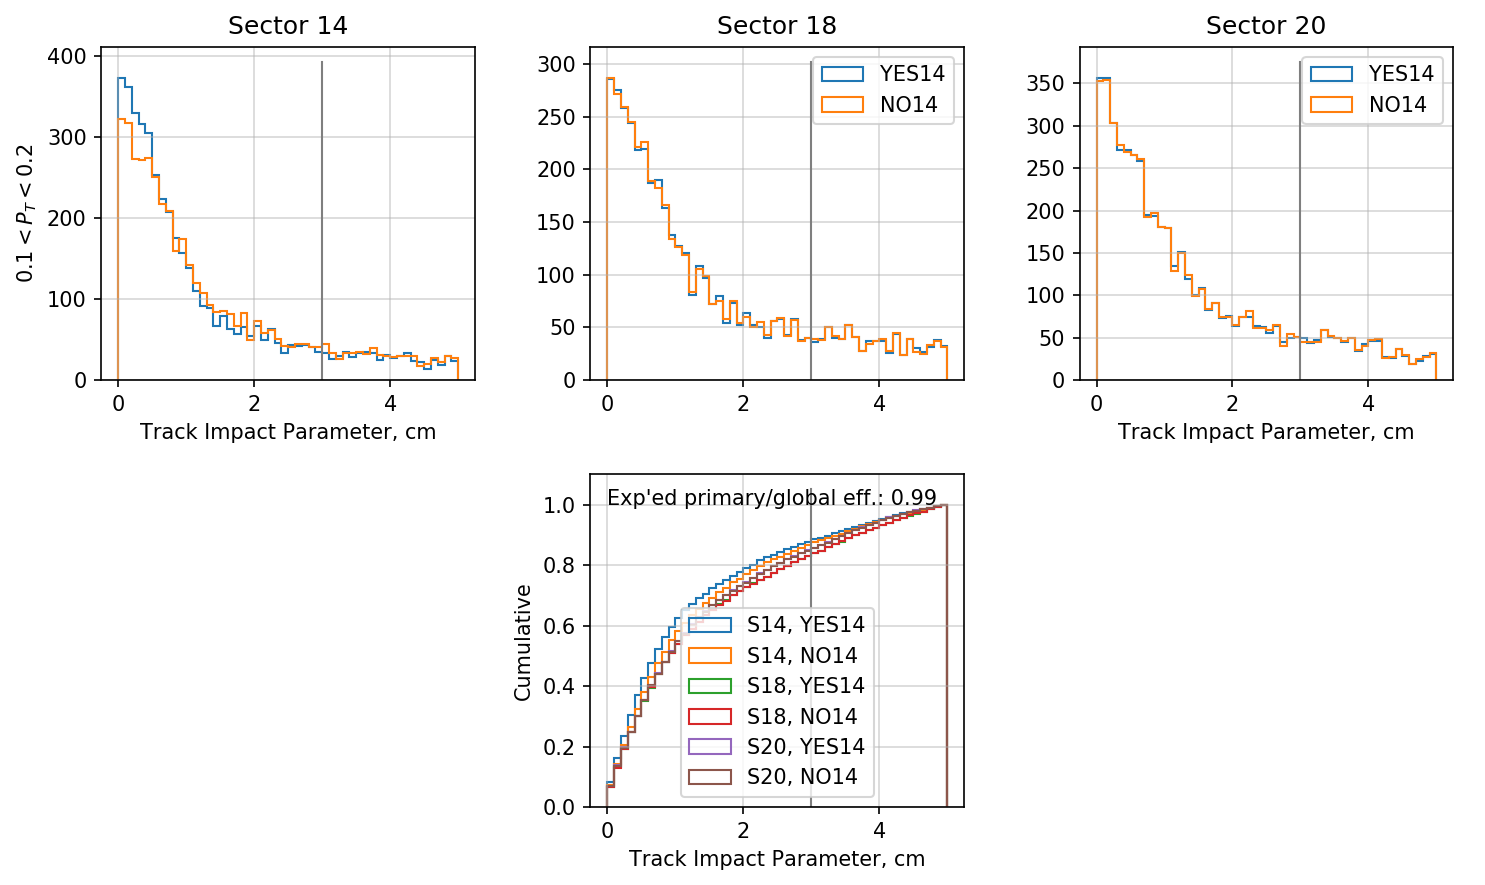

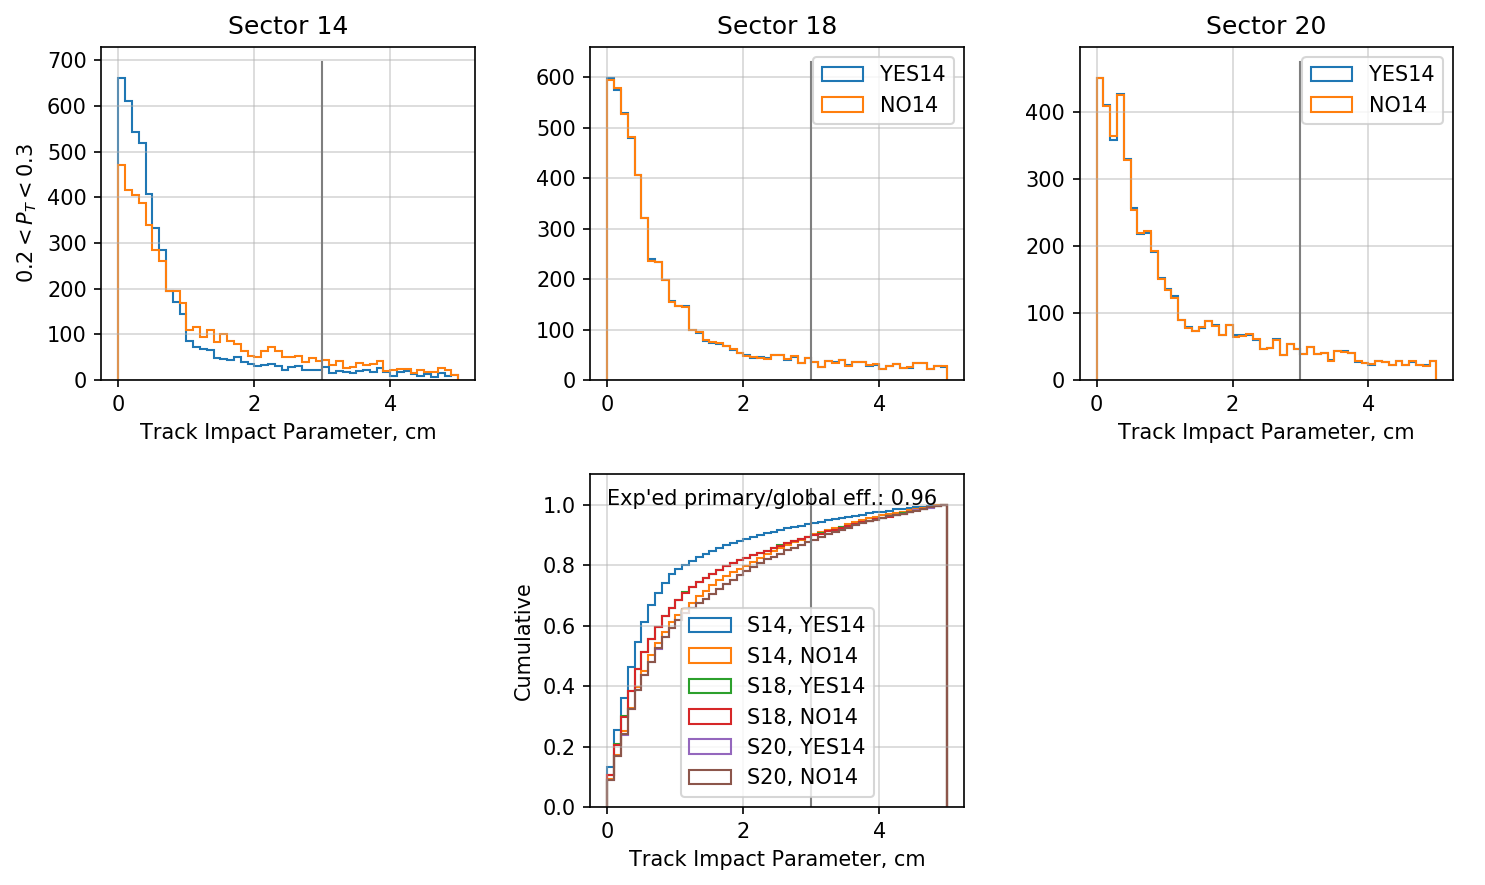

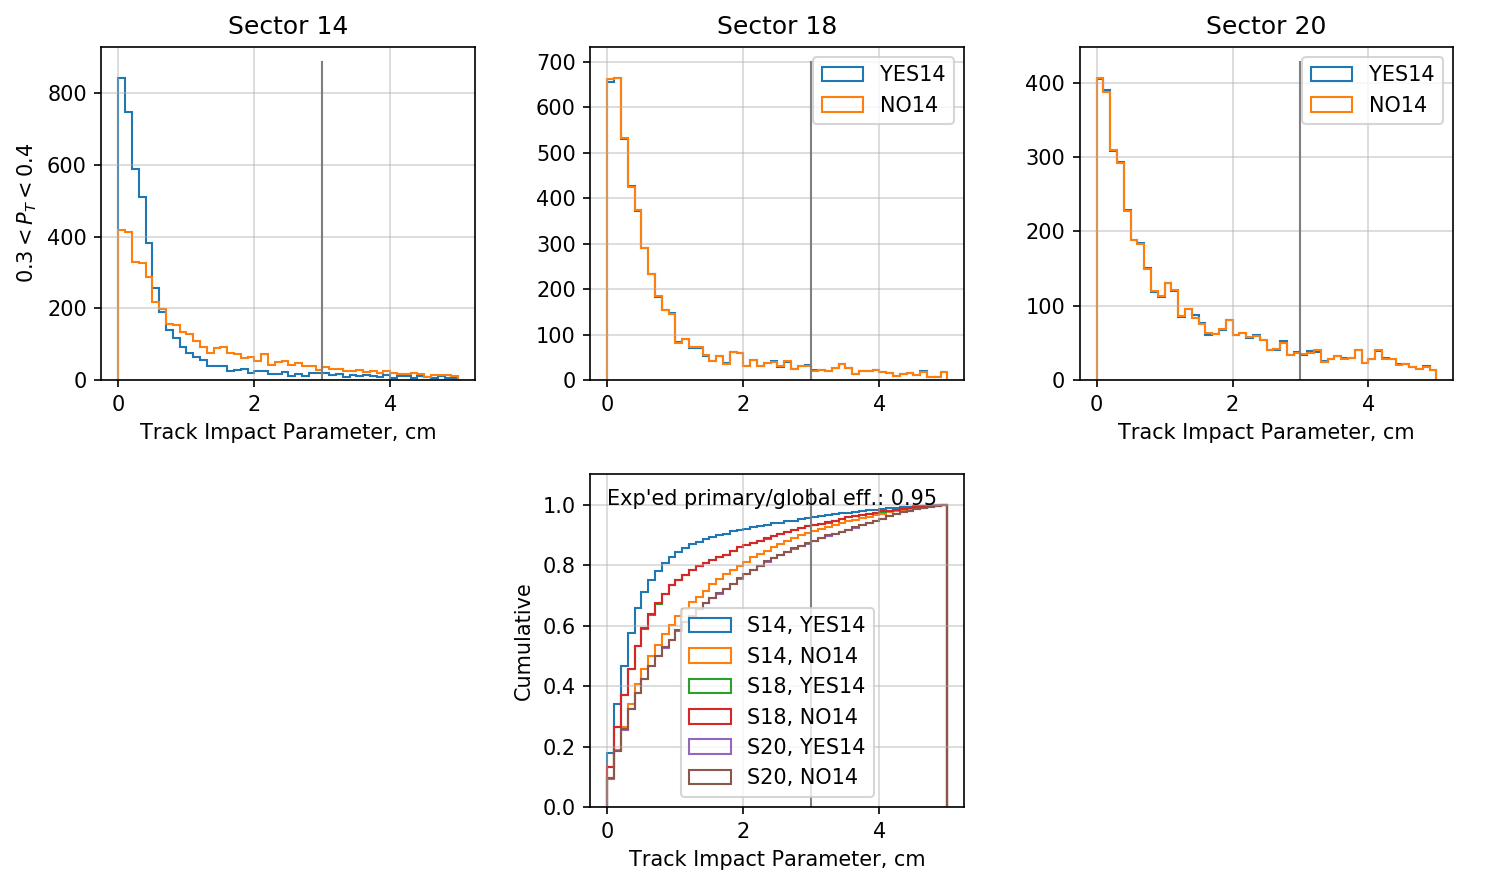

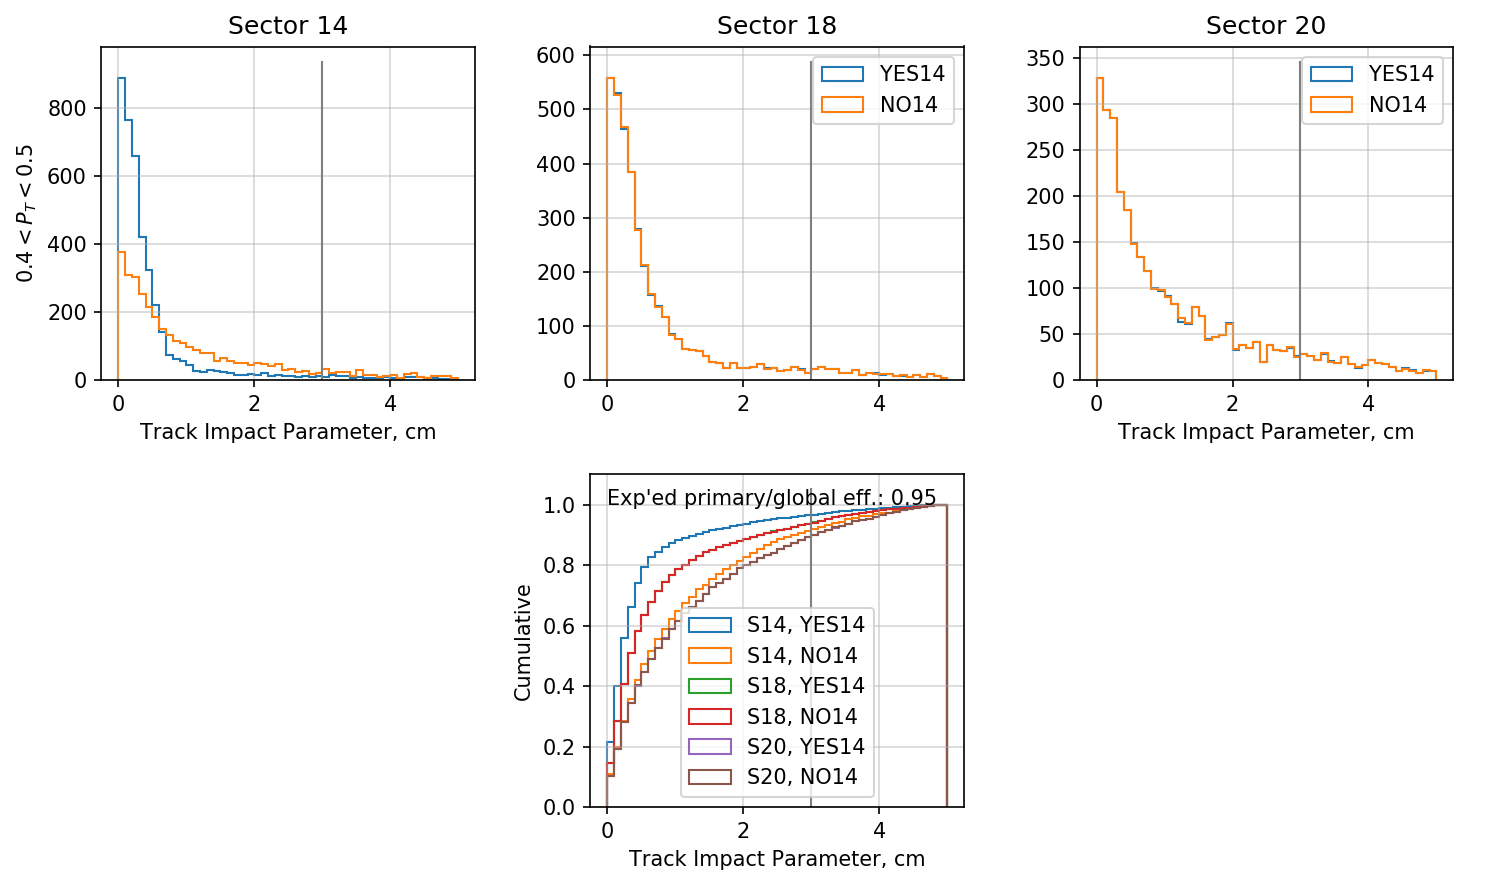

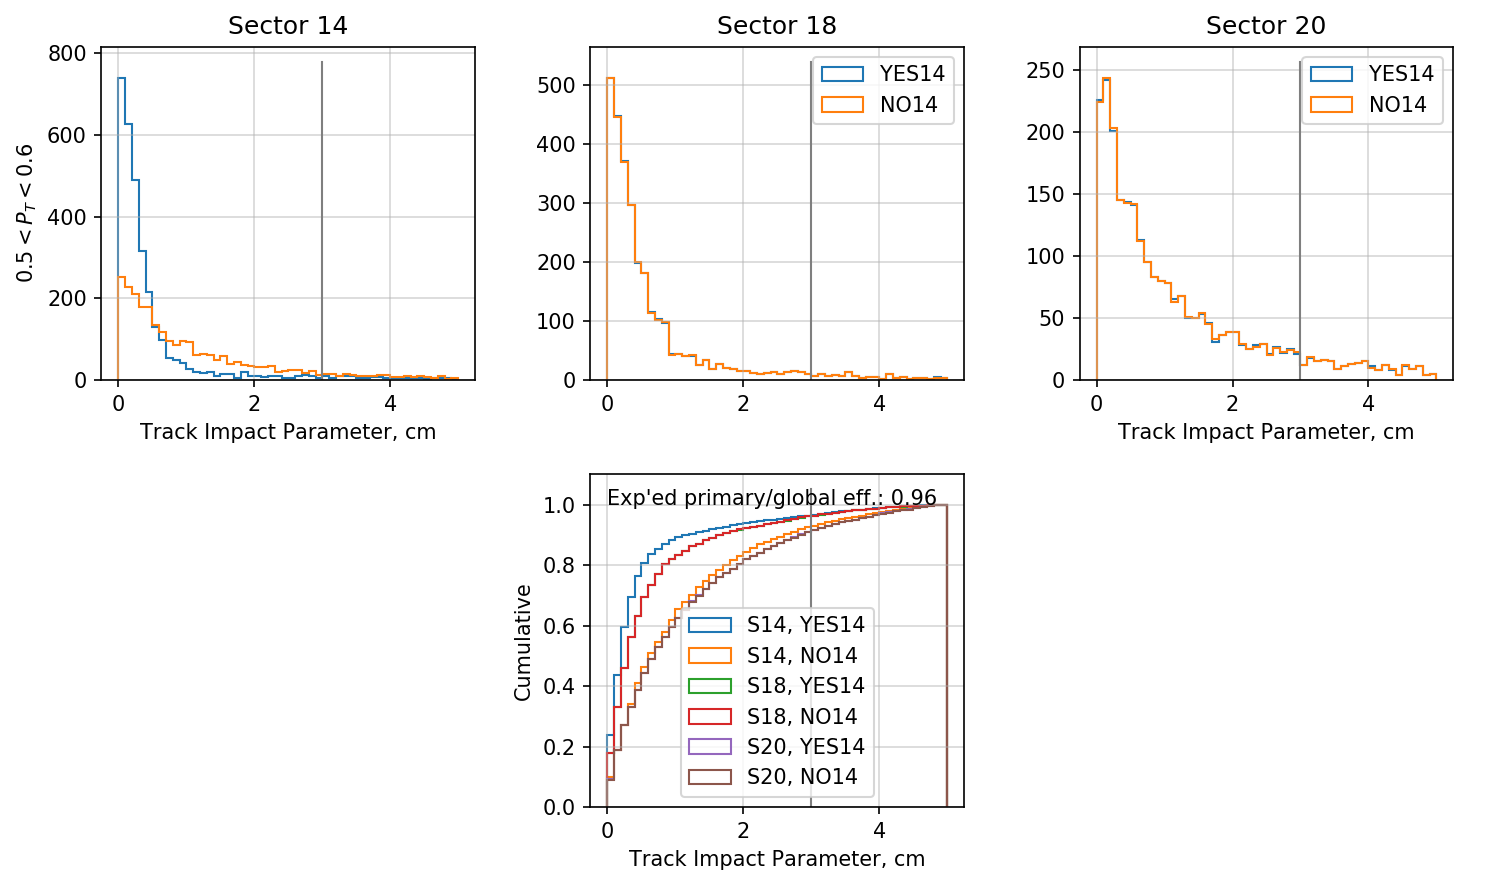

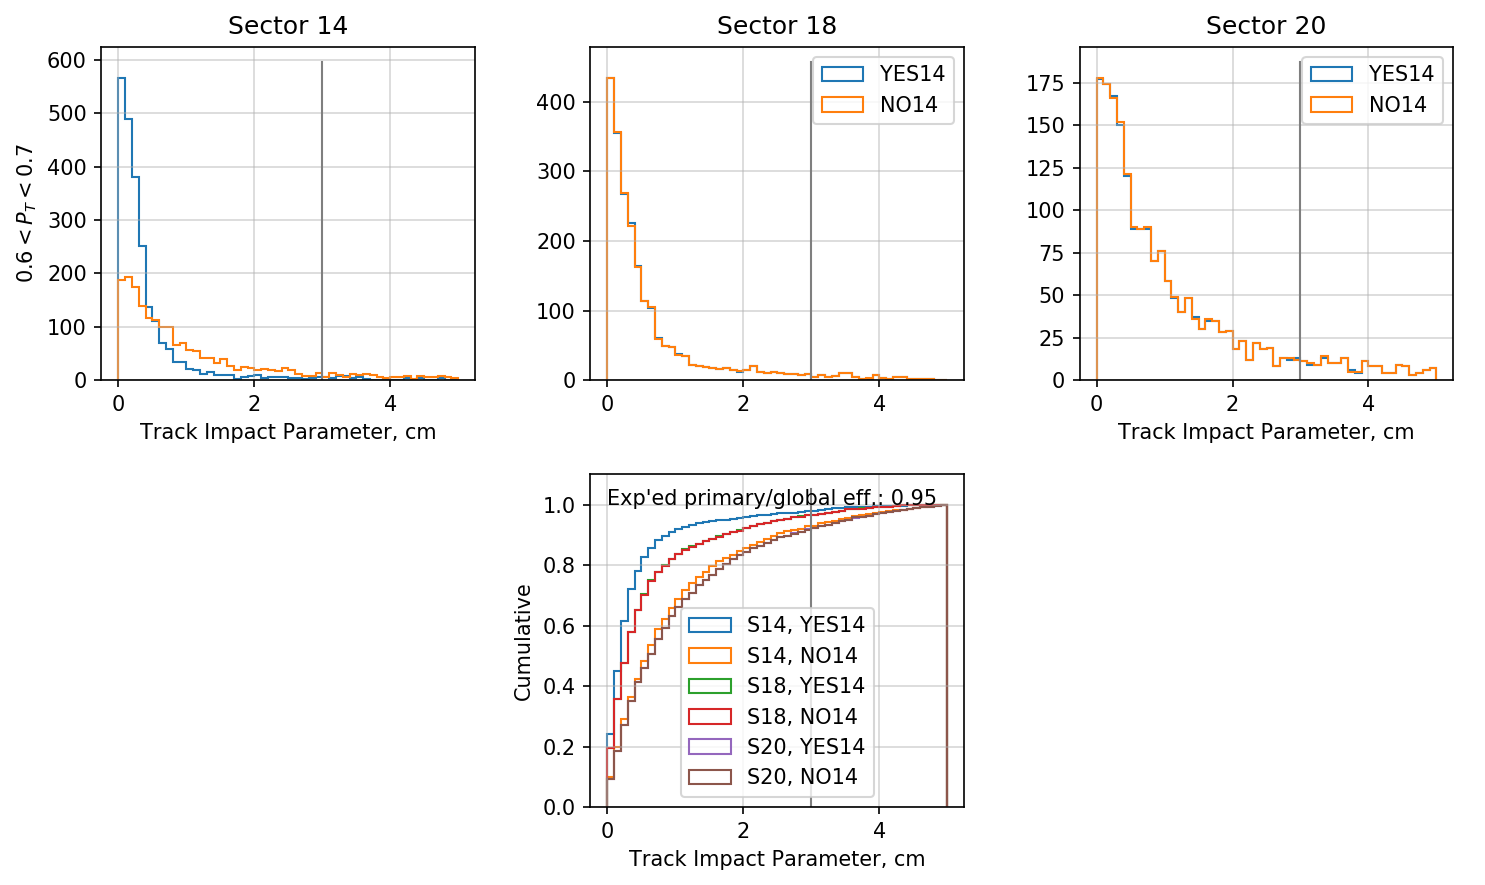

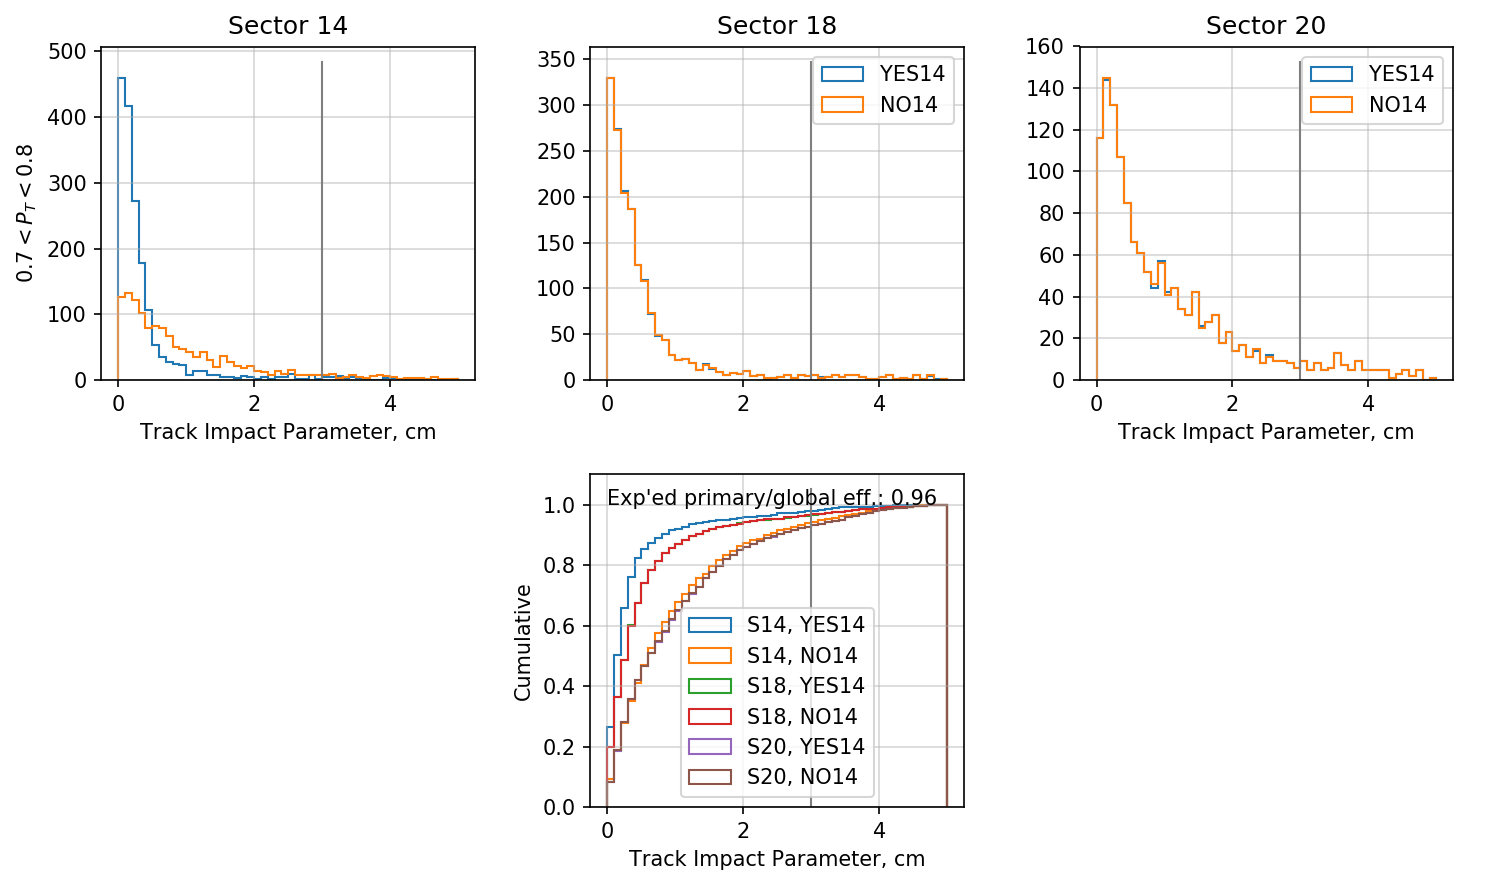

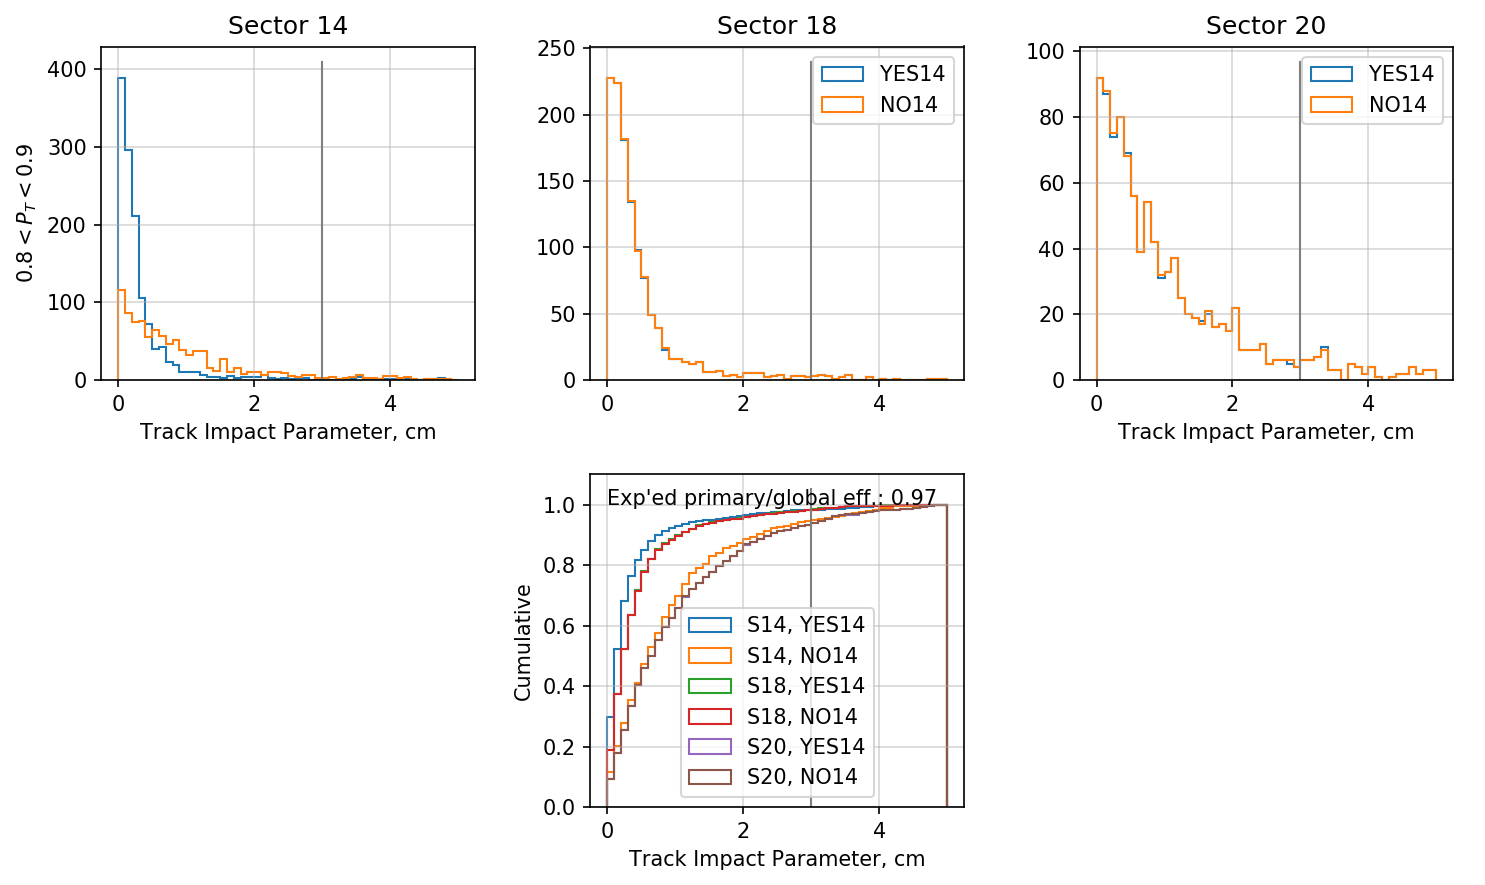

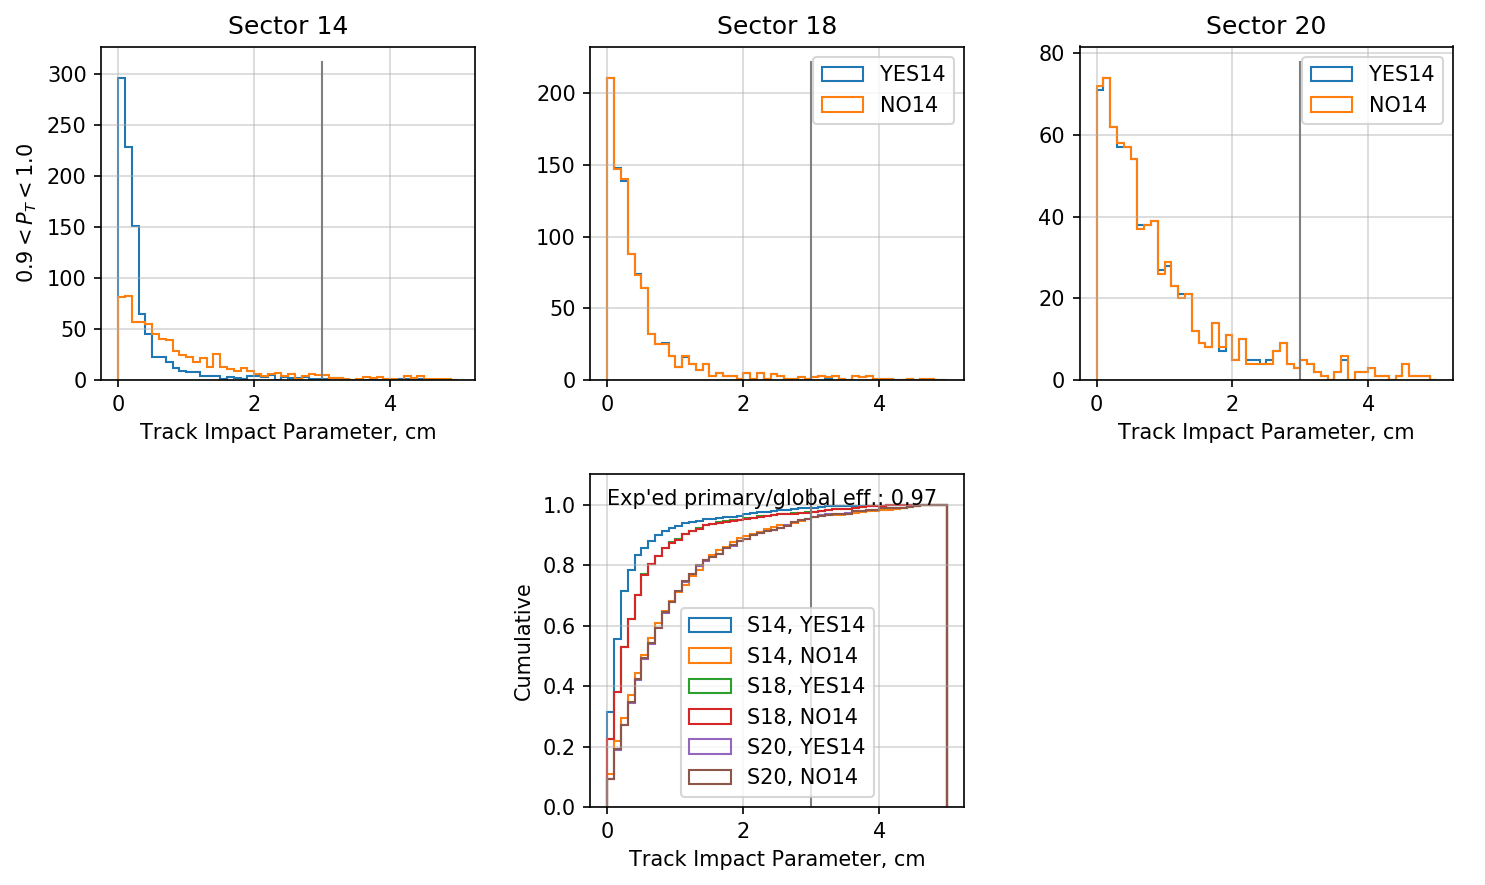

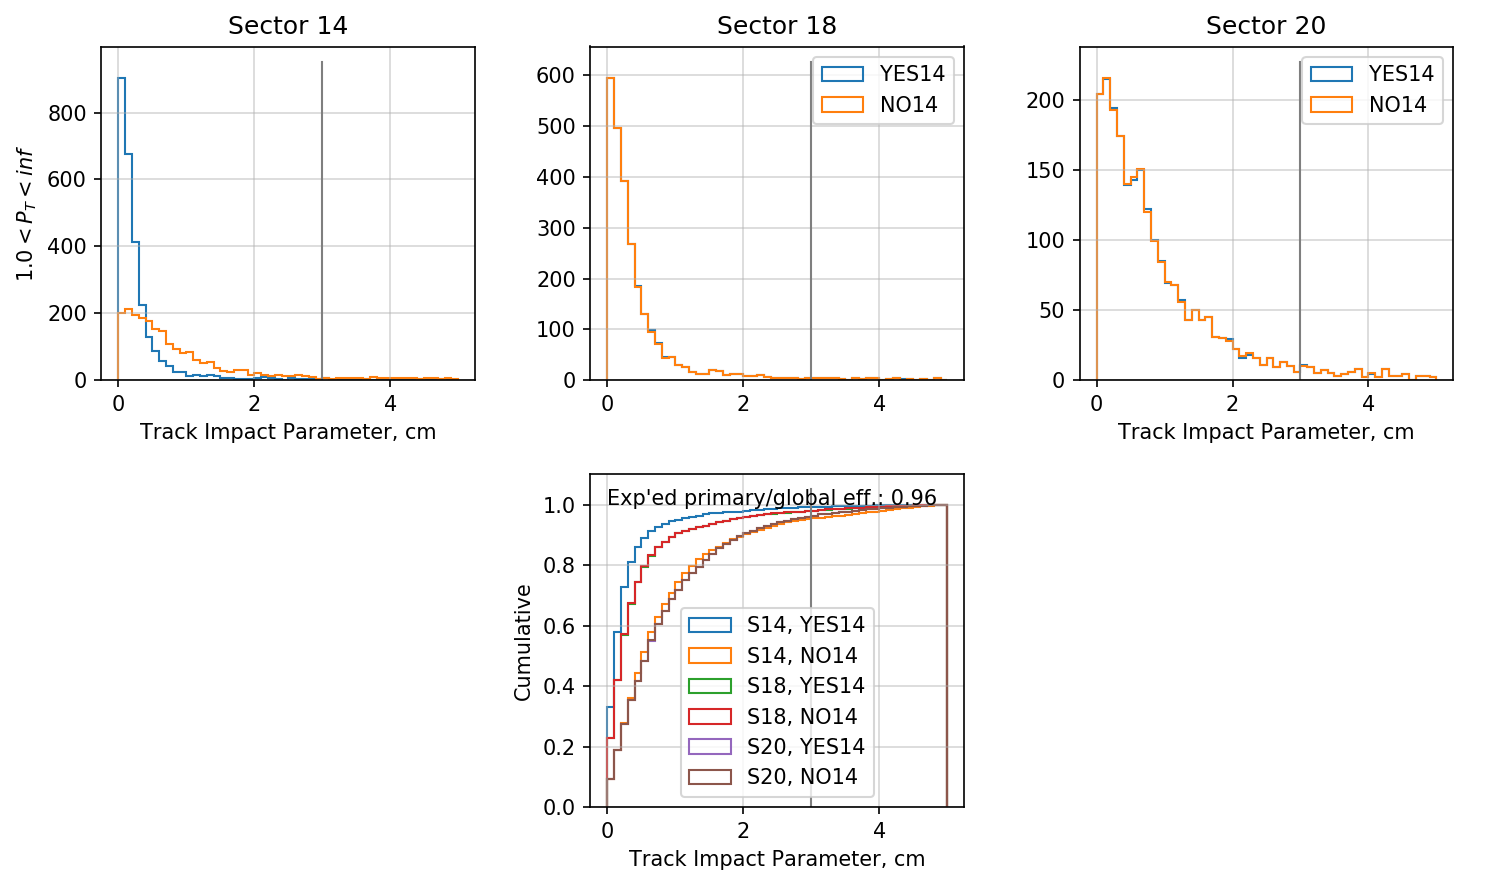

In [74]:
#fig, ax = plt.subplots(nbins_pt*2, 3, figsize=(10, 3*2*nbins_pt), sharex='col')

h_kwargs   = dict(bins=np.linspace(0,5,51), histtype='step')
h_kwargs_c = dict(bins=np.linspace(0,5,51), histtype='step', cumulative=True, density=True)

for i, (pt_min, pt_max) in enumerate(zip(edges_pt, edges_pt[1:])):
 
    fig, ax = plt.subplots(2, 3, figsize=(10, 3*2))

    #r = i*2

    select_Y = points_east_Y & in_pt_bin_Y[i] & in_sector(df_Y, 14)
    select_N = points_east_N & in_pt_bin_N[i] & in_sector(df_N, 14)

    a = ax[0, 0]
    a.hist(abs(df_Y.loc[ select_Y ].imp), label='YES14', **h_kwargs)
    a.hist(abs(df_N.loc[ select_N ].imp), label='NO14', **h_kwargs)
    a.plot([3, 3], a.get_ylim(), 'C7-', lw=1)
    a.set_title('Sector 14') #if i == 0 else None
    a.set_xlabel('Track Impact Parameter, cm') #if i == nbins_pt-1 else None
    a.set_ylabel(f'${pt_min:.1f} < P_T < {pt_max:.1f}$')
    a.grid()
    
    a = ax[1, 1]
    v1, e1, _ = a.hist(abs(df_Y.loc[ select_Y ].imp), label='S14, YES14', **h_kwargs_c)
    v2, e2, _ = a.hist(abs(df_N.loc[ select_N ].imp), label='S14, NO14', **h_kwargs_c)
    ibin3cm = np.argmax(e1>=3)
    eff = v2[ibin3cm]/v1[ibin3cm]
    a.text(0, 1, f'Exp\'ed primary/global eff.: {eff:.2f}')

    # Sector 18
    select_Y = points_east_Y & in_pt_bin_Y[i] & in_sector(df_Y, 18)
    select_N = points_east_N & in_pt_bin_N[i] & in_sector(df_N, 18)

    a = ax[0, 1]
    a.hist(abs(df_Y.loc[ select_Y ].imp), label='YES14', **h_kwargs)
    a.hist(abs(df_N.loc[ select_N ].imp), label='NO14', **h_kwargs)
    a.plot([3, 3], a.get_ylim(), 'C7-', lw=1)
    a.set_title('Sector 18') #if i == 0 else None
    a.set_xlabel('Track Impact Parameter, cm') #if i == nbins_pt-1 else None
    a.grid()
    a.legend(loc='upper right')
    
    a = ax[1, 1]
    a.hist(abs(df_Y.loc[ select_Y ].imp), label='S18, YES14', **h_kwargs_c)
    a.hist(abs(df_N.loc[ select_N ].imp), label='S18, NO14', **h_kwargs_c)

    # Sector 20
    select_Y = points_east_Y & in_pt_bin_Y[i] & in_sector(df_Y, 20)
    select_N = points_east_N & in_pt_bin_N[i] & in_sector(df_N, 20)

    a = ax[0, 2]
    a.hist(abs(df_Y.loc[ select_Y ].imp), label='YES14', **h_kwargs)
    a.hist(abs(df_N.loc[ select_N ].imp), label='NO14', **h_kwargs)
    a.plot([3, 3], a.get_ylim(), 'C7-', lw=1)
    a.set_title('Sector 20') #if i == 0 else None
    a.set_xlabel('Track Impact Parameter, cm') #if i == nbins_pt-1 else None
    a.grid()
    a.legend(loc='upper right')
    
    a = ax[1, 1]
    a.hist(abs(df_Y.loc[ select_Y ].imp), label='S20, YES14', **h_kwargs_c)
    a.hist(abs(df_N.loc[ select_N ].imp), label='S20, NO14', **h_kwargs_c)
    a.plot([3, 3], a.get_ylim(), 'C7-', lw=1)
    a.set_xlabel('Track Impact Parameter, cm') #if i == nbins_pt-1 else None
    a.set_ylabel('Cumulative') #if i == 0 else None
    a.grid()
    a.legend(loc='lower center')
    
    ax[1, 0].axis('off')
    ax[1, 2].axis('off')

    plt.tight_layout()
    #plt.subplots_adjust(hspace=0.05)
    plt.savefig(f'graphics/imp_pt_bin_{i}.png', bbox_inches='tight', pad_inches=0.1)

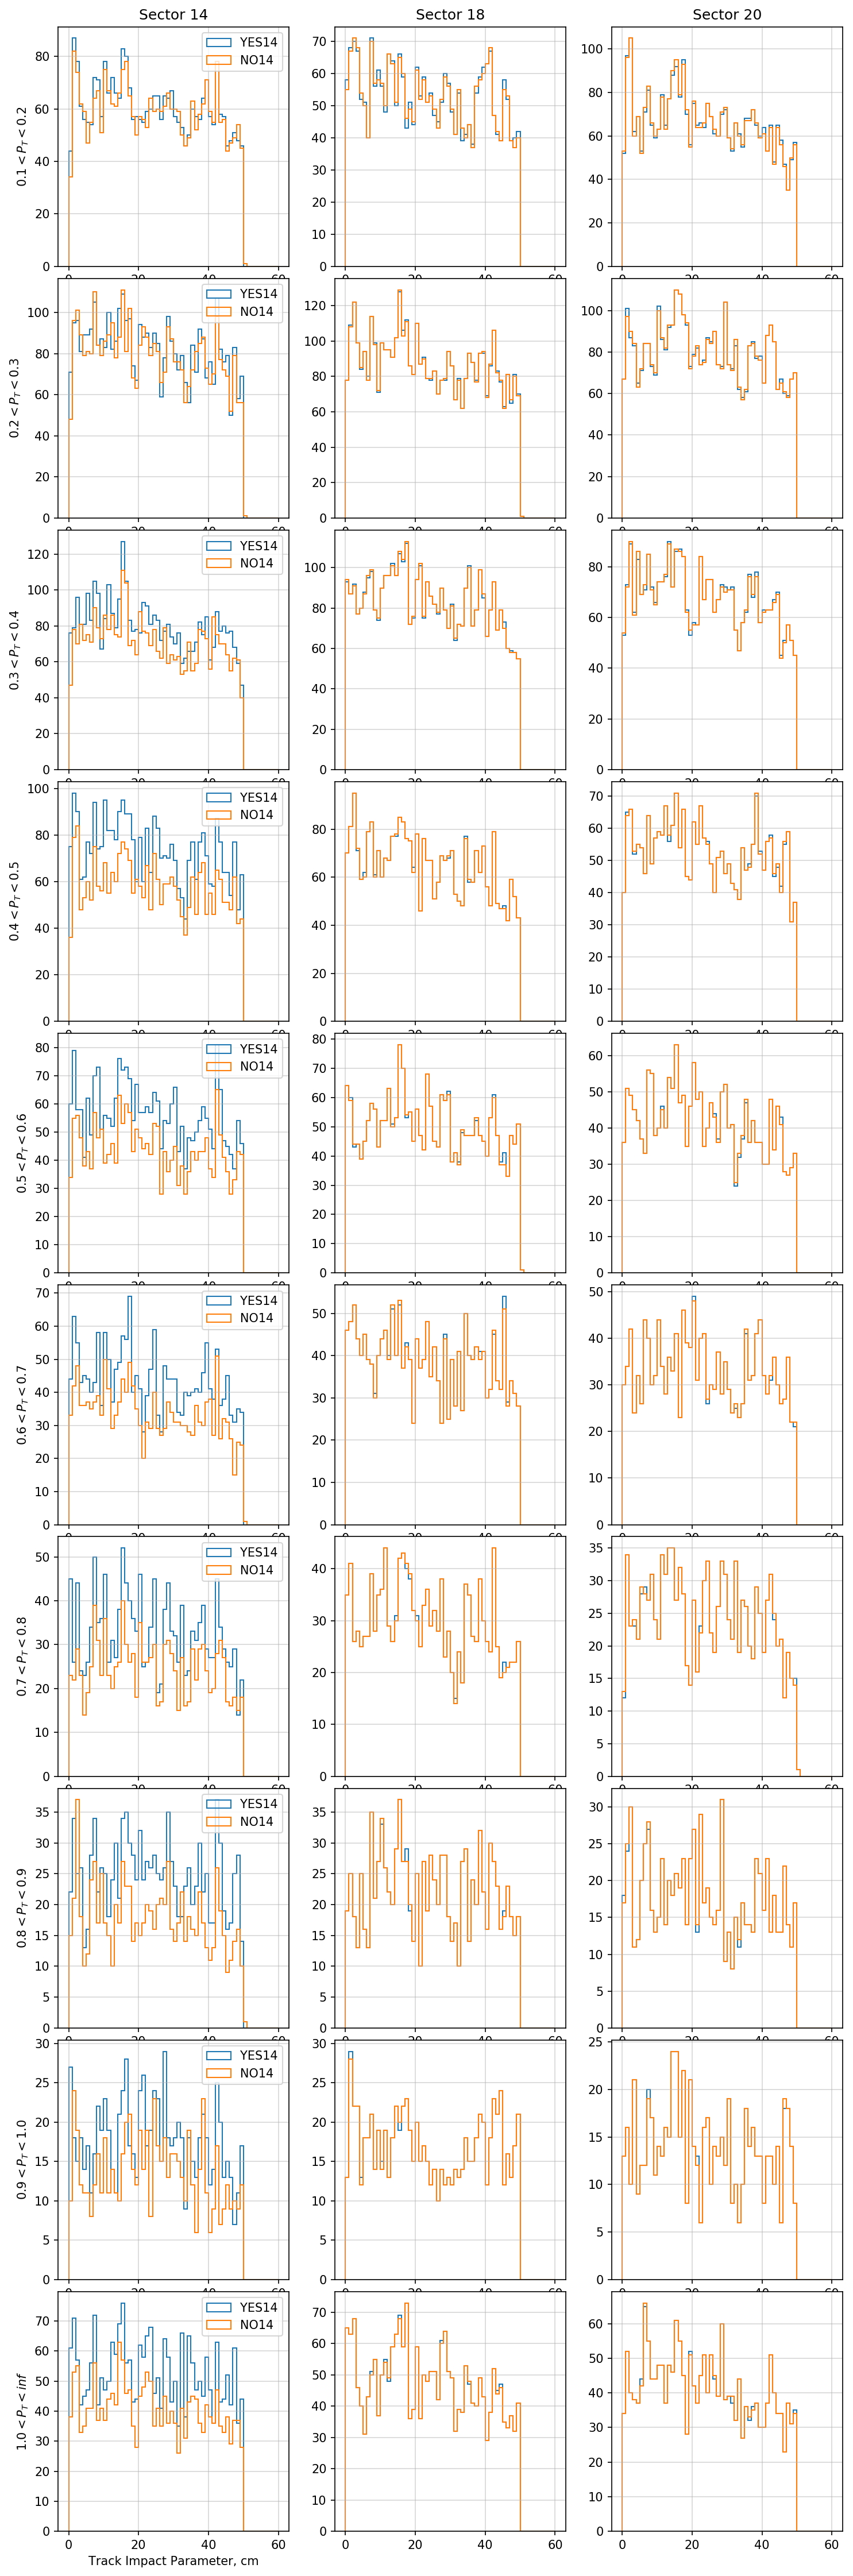

In [50]:
fig, ax = plt.subplots(nbins_pt, 3, figsize=(10, 3*nbins_pt))

#h_kwargs   = dict(bins=np.linspace(0,5,51), histtype='step')
h_kwargs   = dict(bins=np.linspace(0,60,61), histtype='step')

for i, (pt_min, pt_max) in enumerate(zip(edges_pt, edges_pt[1:])):
    
    select_pt_Y = points_east_Y & in_pt_bin_Y[i] & is_primary_Y
    select_pt_N = points_east_N & in_pt_bin_N[i] & is_primary_N 
     
    select_Y = select_pt_Y & in_sector(df_Y, 14)
    select_N = select_pt_N & in_sector(df_N, 14)

    a = ax[i, 0]
    a.hist(abs(df_Y.loc[ select_Y ].imp3d), label='YES14', **h_kwargs)
    a.hist(abs(df_N.loc[ select_N ].imp3d), label='NO14', **h_kwargs)
    a.set_title('Sector 14') if i == 0 else None
    a.set_xlabel('Track Impact Parameter, cm') if i == nbins_pt-1 else None
    a.set_ylabel(f'${pt_min:.1f} < P_T < {pt_max:.1f}$')
    a.grid()
    a.legend(loc='upper right')

    # Sector 18
    select_Y = select_pt_Y & in_sector(df_Y, 18)
    select_N = select_pt_N & in_sector(df_N, 18)

    a = ax[i, 1]
    a.hist(df_Y.loc[ select_Y ].imp3d, label='YES14', **h_kwargs)
    a.hist(df_N.loc[ select_N ].imp3d, label='NO14', **h_kwargs)
    a.set_title('Sector 18') if i == 0 else None
    a.grid()

    # Sector 20
    select_Y = select_pt_Y & in_sector(df_Y, 20)
    select_N = select_pt_N & in_sector(df_N, 20)

    a = ax[i, 2]
    a.hist(df_Y.loc[ select_Y ].imp3d, label='YES14', **h_kwargs)
    a.hist(df_N.loc[ select_N ].imp3d, label='NO14', **h_kwargs)
    a.set_title('Sector 20') if i == 0 else None
    a.grid()

plt.tight_layout()
plt.subplots_adjust(hspace=0.05)
plt.show()

## Summary

- We consider tracks in the TPC sweet spot

- Hits missing in inner TPC layers affect both global and primary tracks
- High $P_T$ tracks: Loss up to 15% is expected
- Low $P_T$ tracks anomaly: More tracks are reconstructed in the neighboring sectors
- A few percent drop in primary tracks is expected across all $P_T$ values

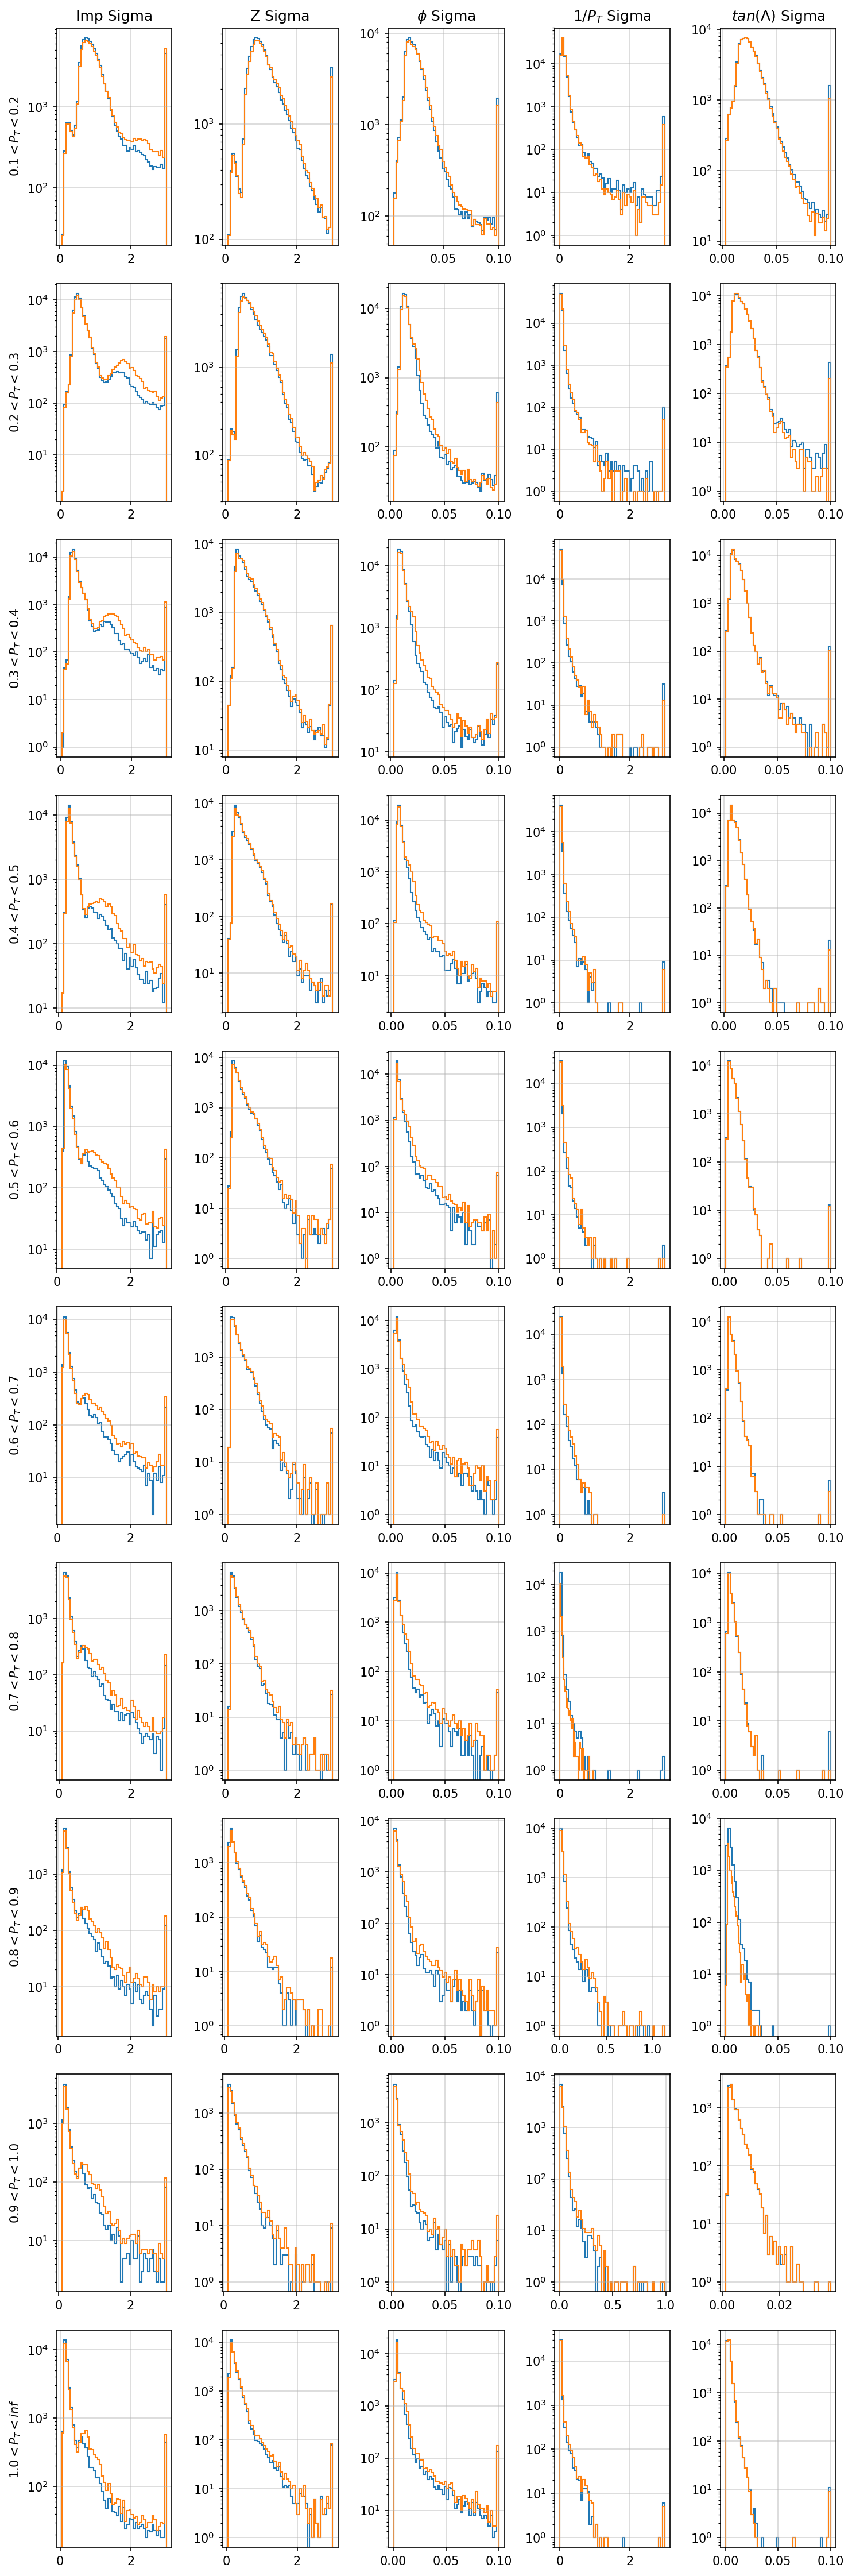

In [13]:
fig, ax = plt.subplots(nbins_pt, 5, figsize=(10, 3*nbins_pt))#, sharex='col')

h_kwargs = dict(bins=50, histtype='step')

for i, (pt_min, pt_max) in enumerate(zip(edges_pt, edges_pt[1:])):
 
    select_Y = points_east_Y & in_pt_bin_Y[i]
    select_N = points_east_N & in_pt_bin_N[i]

    a = ax[i, 0]
    a.hist(df_Y.loc[ select_Y ]['sigma[0]'], label='Y14', **h_kwargs)
    a.hist(df_N.loc[ select_N ]['sigma[0]'], label='N14', **h_kwargs)
    a.set_title('Imp Sigma') if i == 0 else None
    a.set_ylabel(f'${pt_min:.1f} < P_T < {pt_max:.1f}$')
    a.grid()
    a.set_yscale('log')
    
    a = ax[i, 1]
    a.hist(df_Y.loc[ select_Y ]['sigma[1]'], label='Y14', **h_kwargs)
    a.hist(df_N.loc[ select_N ]['sigma[1]'], label='N14', **h_kwargs)
    a.set_title('Z Sigma') if i == 0 else None
    a.grid()
    a.set_yscale('log')
    
    a = ax[i, 2]
    a.hist(df_Y.loc[ select_Y ]['sigma[2]'], label='Y14', **h_kwargs)
    a.hist(df_N.loc[ select_N ]['sigma[2]'], label='N14', **h_kwargs)
    a.set_title('$\phi$ Sigma') if i == 0 else None
    a.grid()
    a.set_yscale('log')
    
    a = ax[i, 3]
    a.hist(df_Y.loc[ select_Y ]['sigma[3]'], label='Y14', **h_kwargs)
    a.hist(df_N.loc[ select_N ]['sigma[3]'], label='N14', **h_kwargs)
    a.set_title('$1/P_T$ Sigma') if i == 0 else None
    a.grid()
    a.set_yscale('log')
    
    a = ax[i, 4]
    a.hist(df_Y.loc[ select_Y ]['sigma[4]'], label='Y14', **h_kwargs)
    a.hist(df_N.loc[ select_N ]['sigma[4]'], label='N14', **h_kwargs)
    a.set_title('$tan(\Lambda)$ Sigma') if i == 0 else None
    a.grid()
    a.set_yscale('log')
    
fig.tight_layout()
plt.show()

## Number of hits on tracks

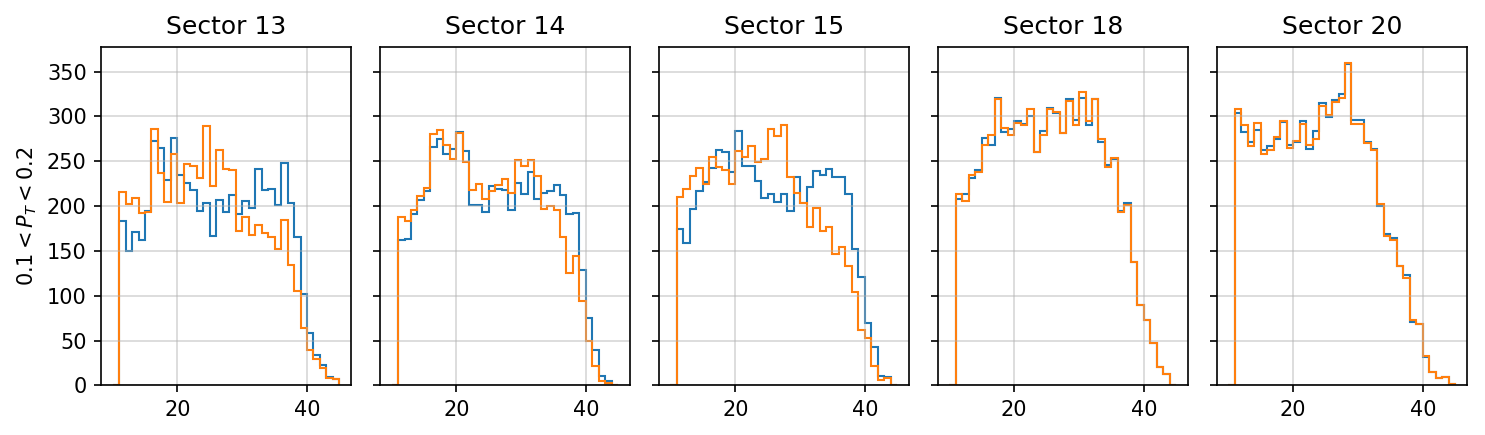

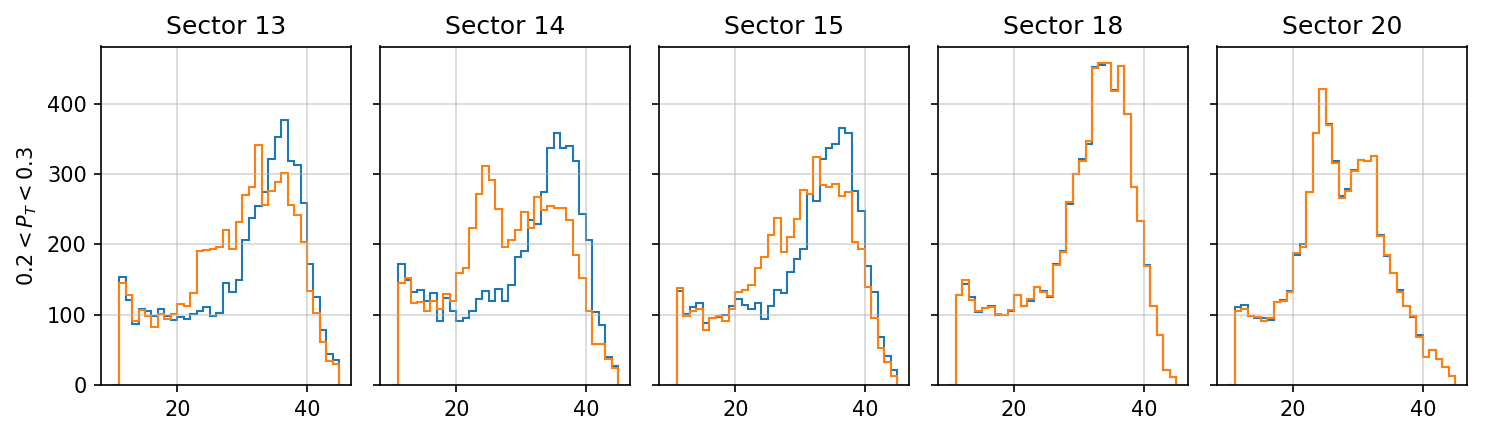

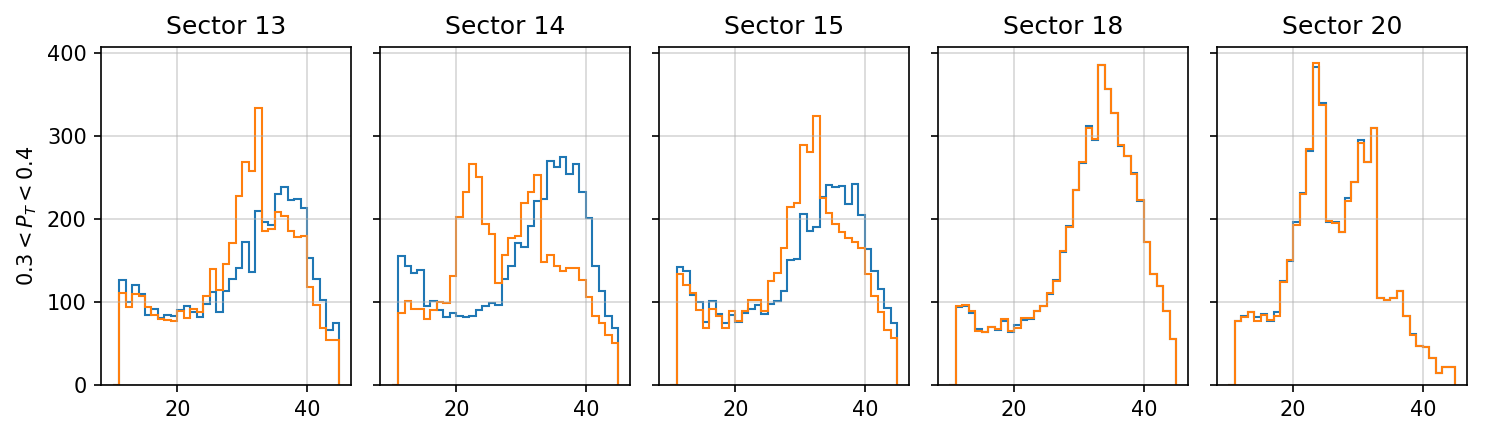

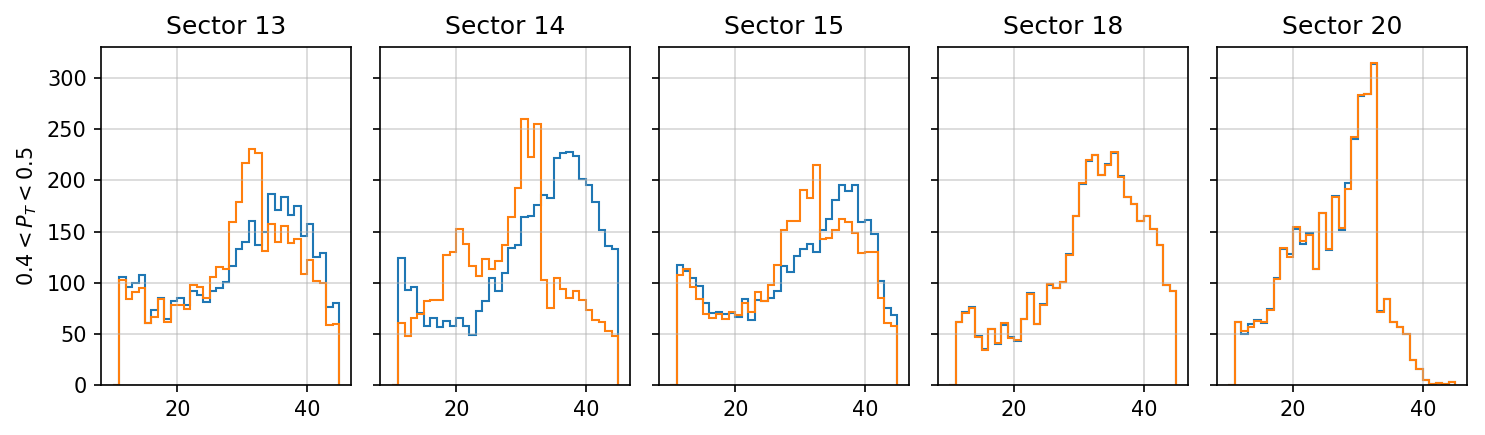

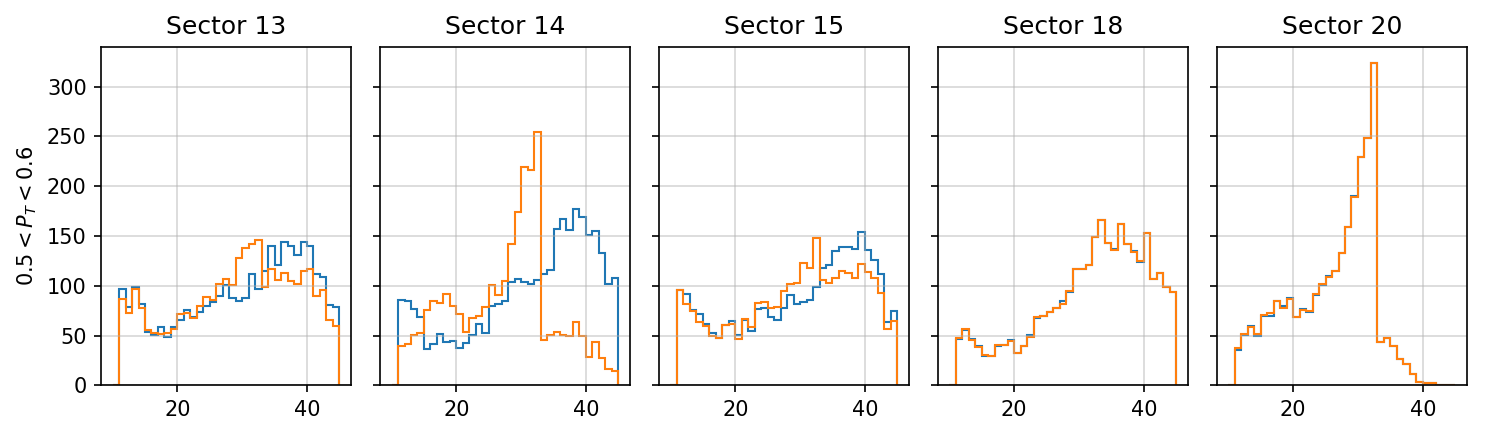

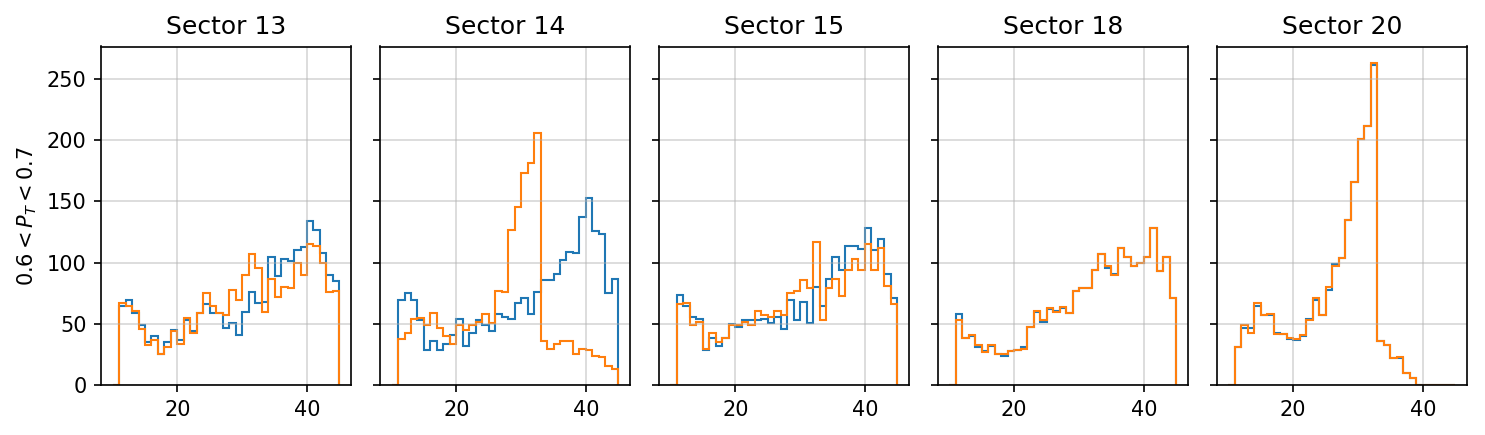

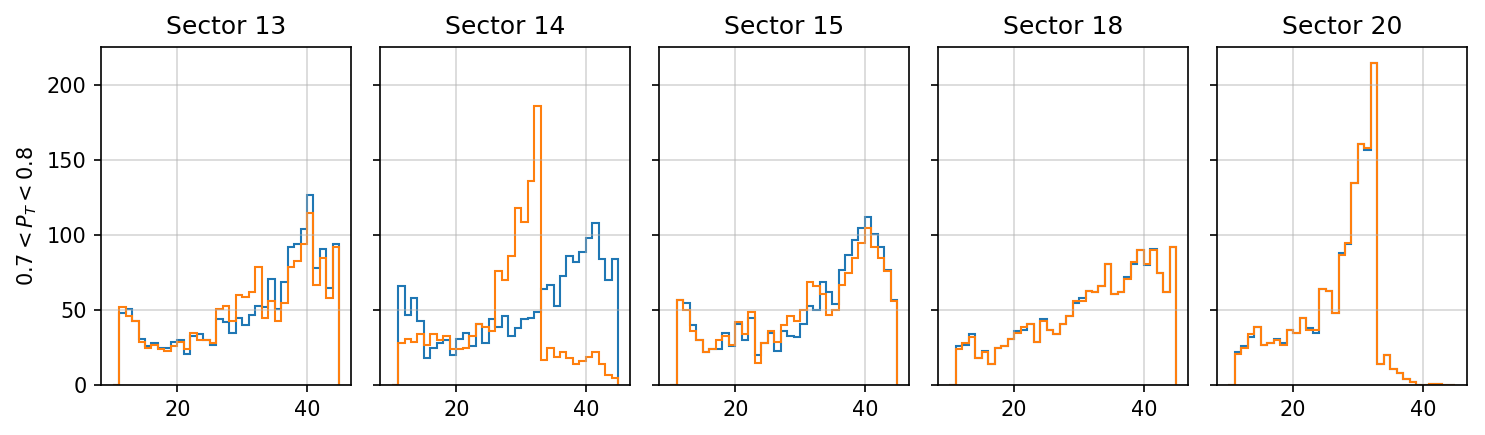

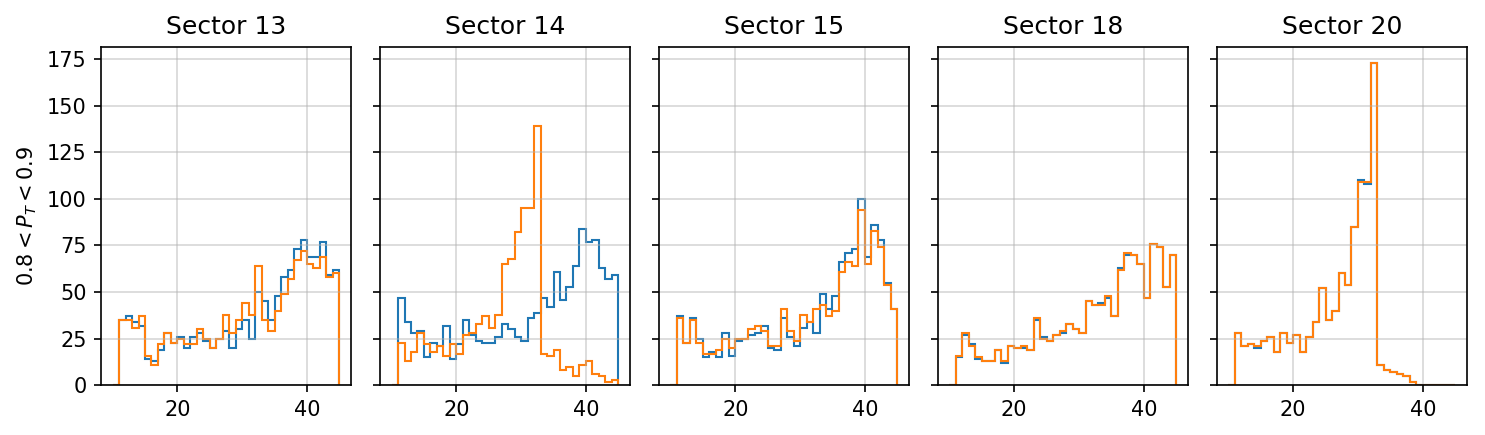

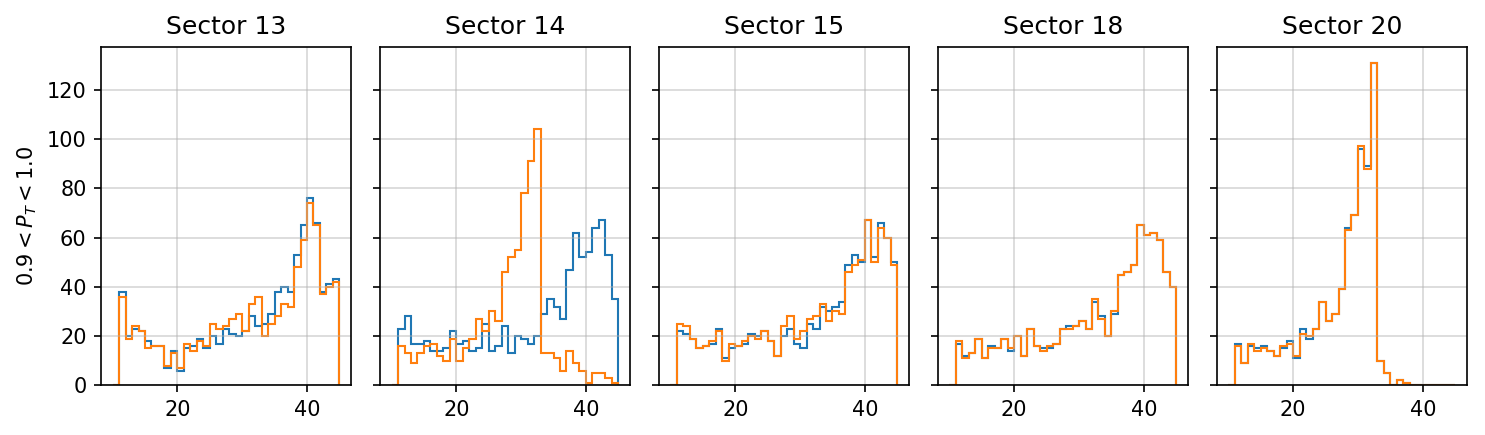

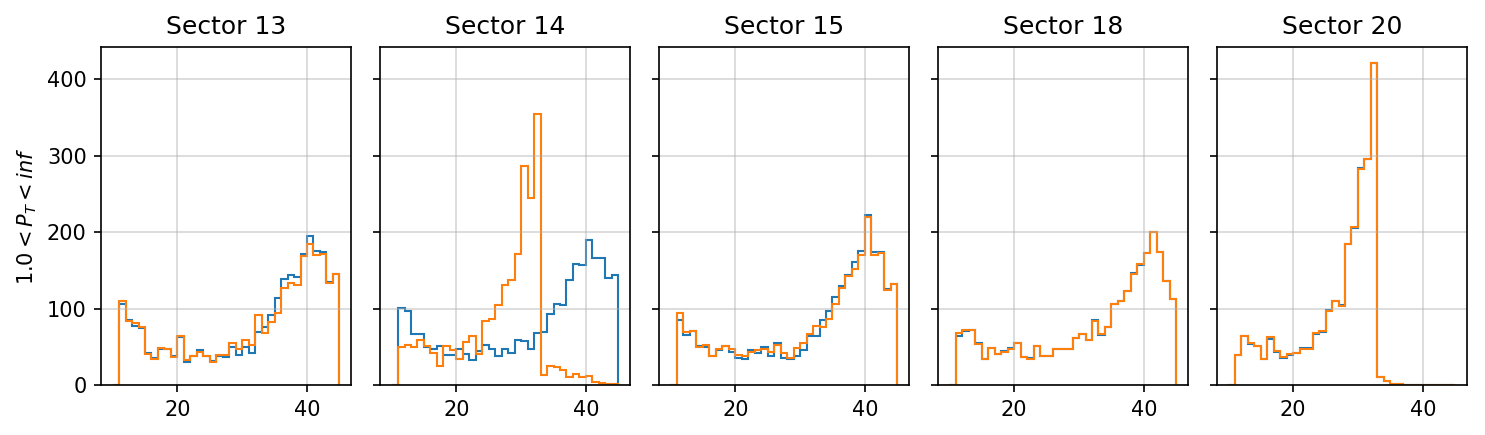

In [72]:
#fig, ax = plt.subplots(nbins_pt, 5, figsize=(10, 3*nbins_pt), sharey='row')

h_kwargs = dict(bins=np.linspace(10, 45, 36), histtype='step')

for i, (pt_min, pt_max) in enumerate(zip(edges_pt, edges_pt[1:])):
    
    fig, ax = plt.subplots(1, 5, figsize=(10, 3), sharey='row')
    
    select_pt_Y = points_east_Y & in_pt_bin_Y[i]
    select_pt_N = points_east_N & in_pt_bin_N[i]
    
    select_Y = select_pt_Y & in_sector(df_Y, 13)
    select_N = select_pt_N & in_sector(df_N, 13)

    a = ax[0]
    a.hist(abs(df_Y.loc[ select_Y ].nhits), label='YES14', **h_kwargs)
    a.hist(abs(df_N.loc[ select_N ].nhits), label='NO14', **h_kwargs)
    a.set_title('Sector 13') #if i == 0 else None
    a.set_ylabel(f'${pt_min:.1f} < P_T < {pt_max:.1f}$')
    a.grid()
    
    select_Y = select_pt_Y & in_sector(df_Y, 14)
    select_N = select_pt_N & in_sector(df_N, 14)

    a = ax[1]
    a.hist(abs(df_Y.loc[ select_Y ].nhits), label='YES14', **h_kwargs)
    a.hist(abs(df_N.loc[ select_N ].nhits), label='NO14', **h_kwargs)
    a.set_title('Sector 14') #if i == 0 else None
    a.grid()
    
    select_Y = select_pt_Y & in_sector(df_Y, 15)
    select_N = select_pt_N & in_sector(df_N, 15)

    a = ax[2]
    a.hist(abs(df_Y.loc[ select_Y ].nhits), label='YES14', **h_kwargs)
    a.hist(abs(df_N.loc[ select_N ].nhits), label='NO14', **h_kwargs)
    a.set_title('Sector 15') #if i == 0 else None
    a.grid()
    
    select_Y = select_pt_Y & in_sector(df_Y, 18)
    select_N = select_pt_N & in_sector(df_N, 18)

    a = ax[3]
    a.hist(abs(df_Y.loc[ select_Y ].nhits), label='YES14', **h_kwargs)
    a.hist(abs(df_N.loc[ select_N ].nhits), label='NO14', **h_kwargs)
    a.set_title('Sector 18') #if i == 0 else None
    a.grid()
    
    select_Y = select_pt_Y & in_sector(df_Y, 20)
    select_N = select_pt_N & in_sector(df_N, 20)

    a = ax[4]
    a.hist(abs(df_Y.loc[ select_Y ].nhits), label='YES14', **h_kwargs)
    a.hist(abs(df_N.loc[ select_N ].nhits), label='NO14', **h_kwargs)
    a.set_title('Sector 20') #if i == 0 else None
    a.grid()

    plt.tight_layout()
    #plt.subplots_adjust(hspace=0.01, wspace=0.01)
    plt.savefig(f'graphics/nhits_pt_bin_{i}.png', bbox_inches='tight', pad_inches=0.1)